# 0. 安装必要的库，这里已经显示安装好

In [1]:
# !pip install NJmatML
# !pip install matplotlib
# !pip install sklearn
# !pip install scikit-learn
# !pip install pandas 
# !pip install gplearn 
# !pip install imblearn 
# !pip install numpy
# !pip install seaborn
# !pip install xgboost
# !pip install rdkit
# !pip install padelpy
# !pip install pymatgen
# !pip install matminer
from NJmatML import dataML 
import warnings
warnings.filterwarnings("ignore")

# 1. file_name打开的文件名可视化pandas数据
#### data是csv倒入时的数据集
#### data_rfe在后面会有，是rfe特征选择后的总数据集
#### t是rfe特征选择后的特征数据
#### target是rfe特征选择后的目标数据

     A1 NumberofProtons  A2 NumberofProtons  B NumberofProtons  \
0                     3                   3                 32   
1                    11                  11                 32   
2                    19                  19                 32   
3                    37                  37                 32   
4                    55                  55                 32   
..                  ...                 ...                ...   
300                  19                  19                 29   
301                  19                  19                 26   
302                  19                  19                 12   
303                  19                  19                 25   
304                  19                  19                 28   

     X1 NumberofProtons  X2 NumberofProtons  X3 NumberofProtons  \
0                     9                   9                   9   
1                     9                   9                   9   
2     

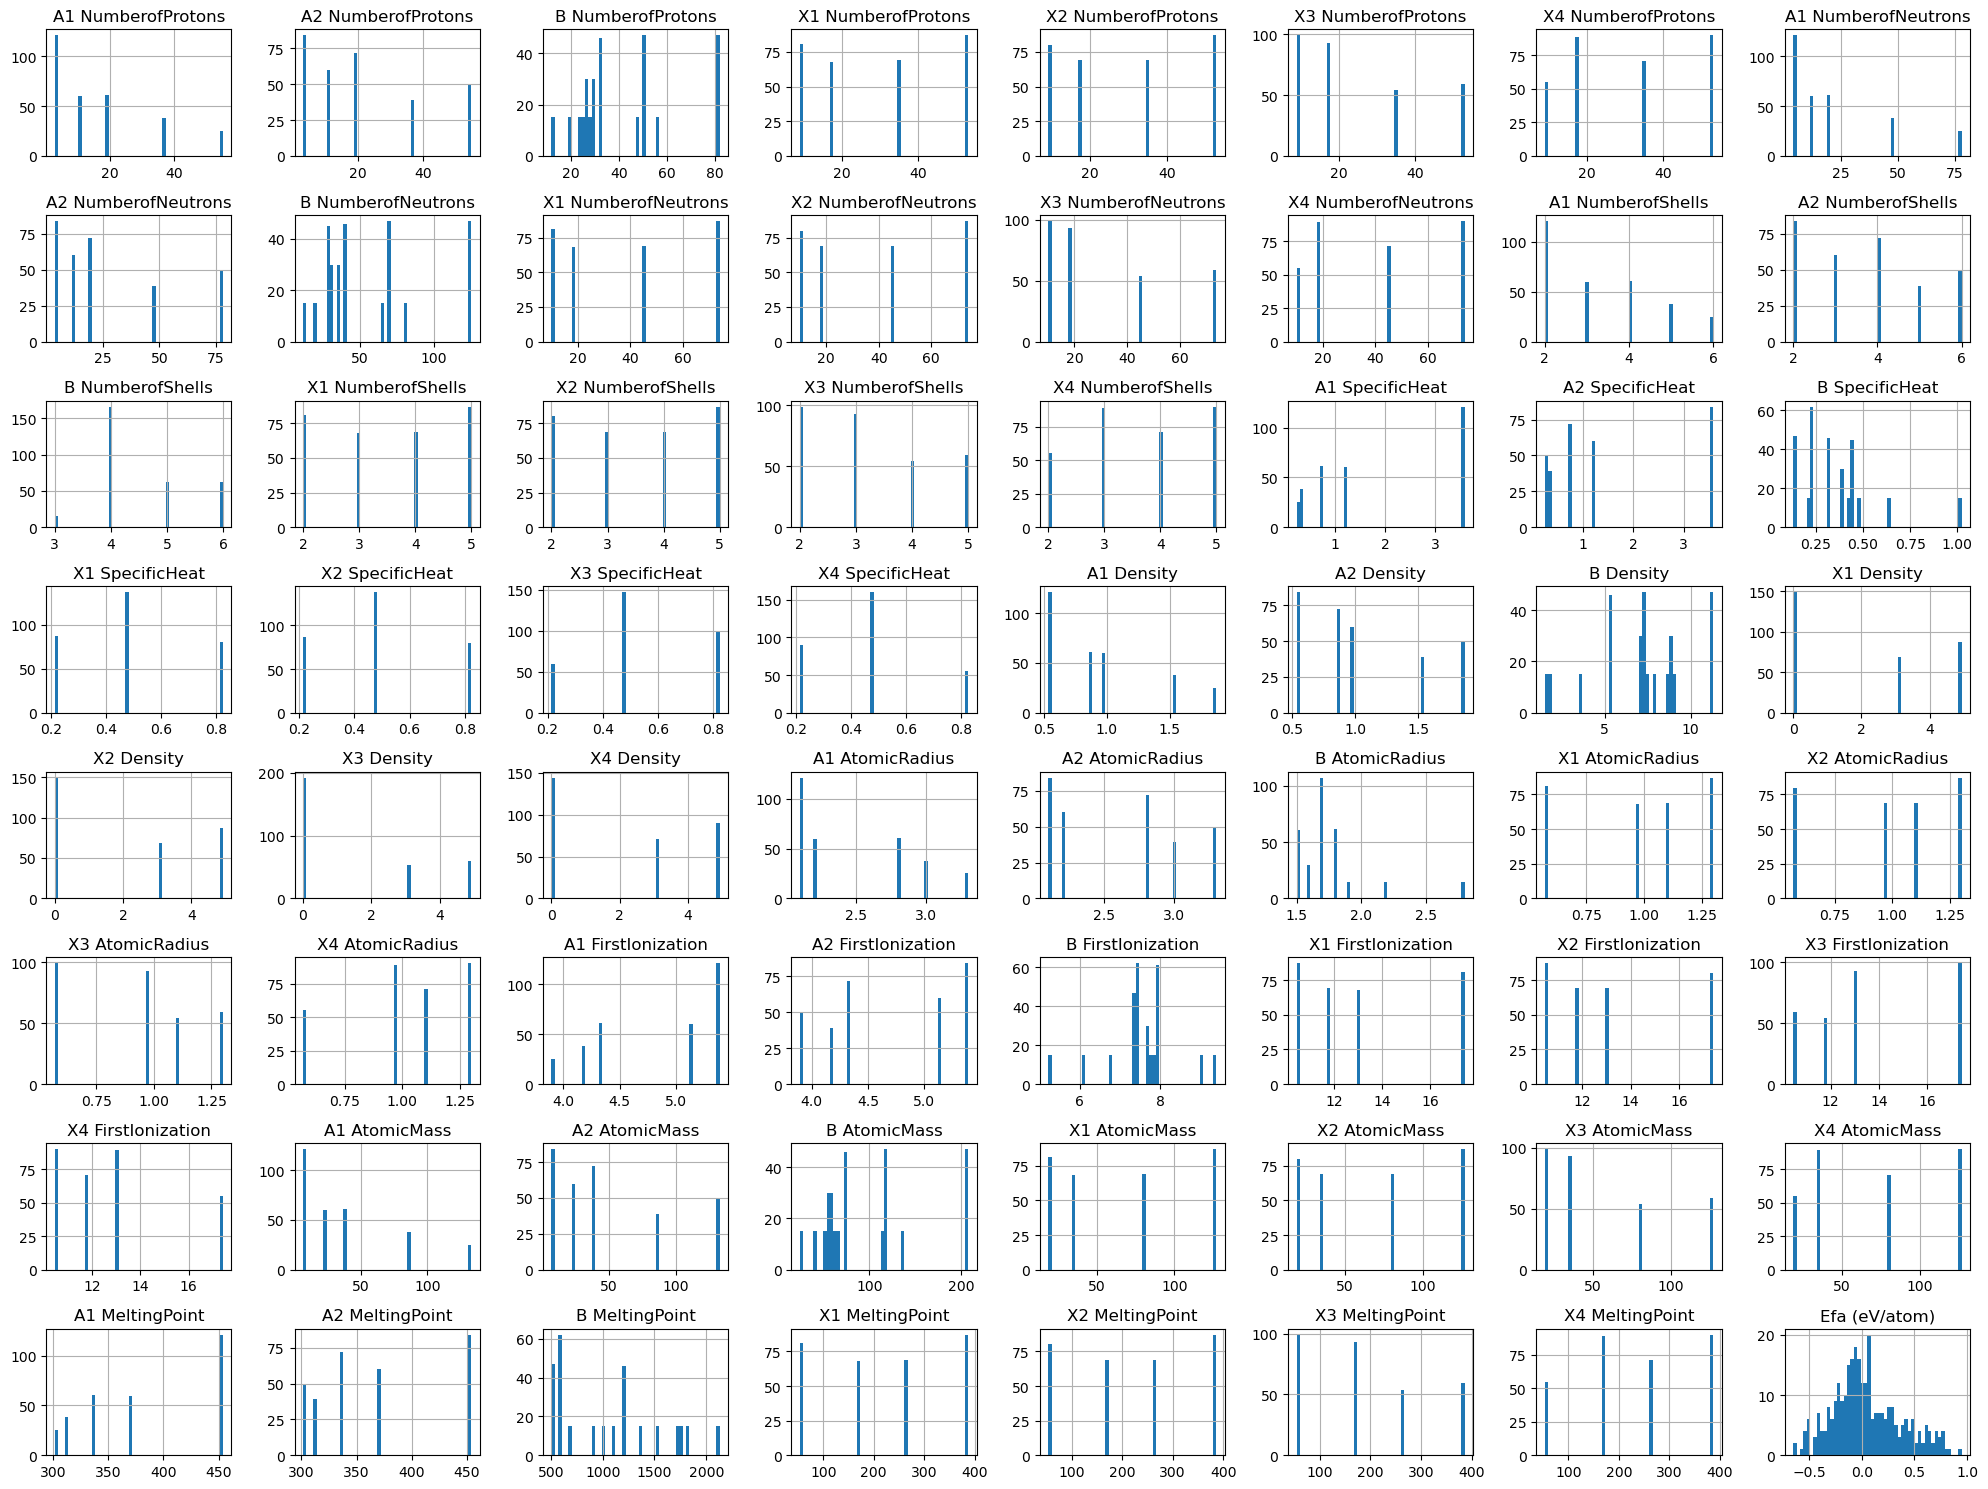

In [2]:
dataML.file_name('2DEformationCleaned.csv') #打开csv并存到data中
dataML.hist()  #画所有列分布的柱状图，例如potential 在0.3 V最多

# 2. 封装函数特征选择之前heatmap画热图

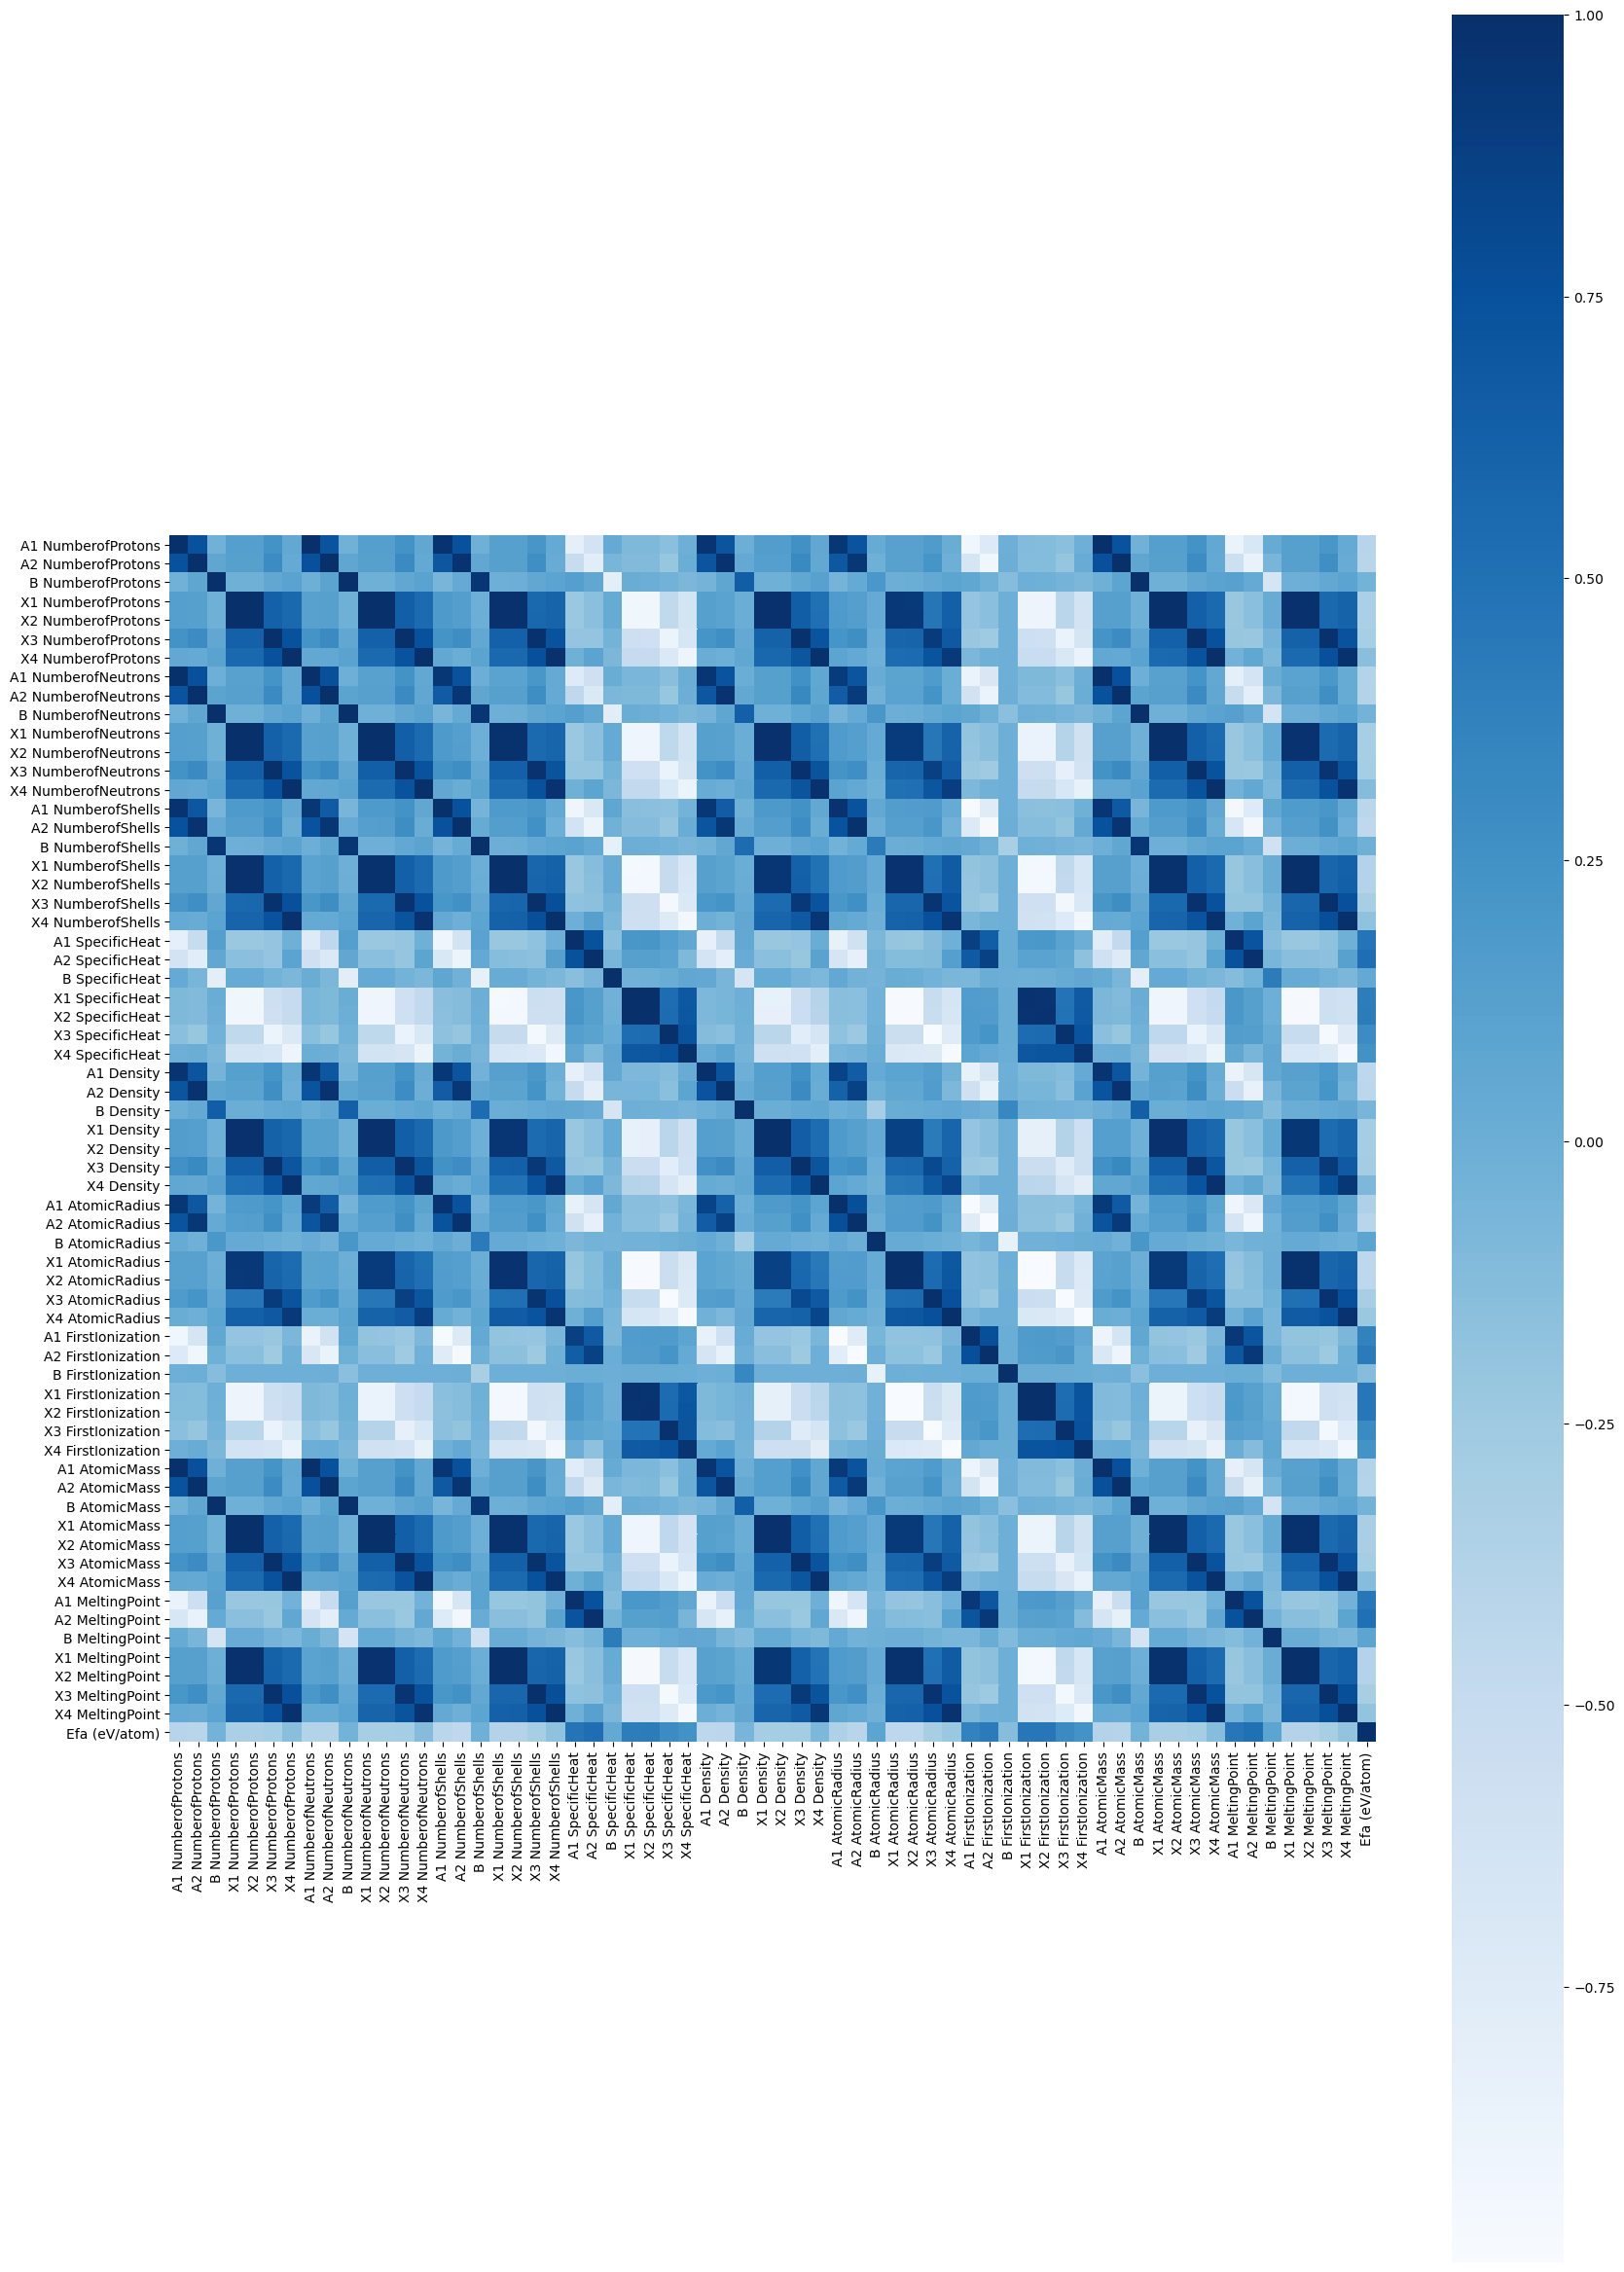

In [3]:
dataML.heatmap_before() #画特征选择之前的总heatmap热图

# 3. rfe特征选择

In [4]:
dataML.feature_rfe_select1(23)   #23为希望最后剩余的特征数目，可以自行改变

特征是否被选中：
 [False False  True False  True  True False False False False False False
 False False False  True False False  True False  True  True  True  True
 False  True False False  True  True  True False False False False False
  True  True False False False  True False  True  True False  True False
 False False  True False False  True False False False  True  True False
 False False False]
获取的数据特征尺寸: (305, 23)
最后的特征s_rfe: ['B NumberofProtons' 'X2 NumberofProtons' 'X3 NumberofProtons'
 'A2 NumberofShells' 'X2 NumberofShells' 'X4 NumberofShells'
 'A1 SpecificHeat' 'A2 SpecificHeat' 'B SpecificHeat' 'X2 SpecificHeat'
 'A1 Density' 'A2 Density' 'B Density' 'A2 AtomicRadius' 'B AtomicRadius'
 'X4 AtomicRadius' 'A2 FirstIonization' 'B FirstIonization'
 'X2 FirstIonization' 'A2 AtomicMass' 'X2 AtomicMass' 'A2 MeltingPoint'
 'B MeltingPoint']
目标target:      Efa (eV/atom)
0         0.817268
1         0.468555
2         0.457779
3         0.305243
4         0.080708
..             ...
300     

# 4 画rfe特征选择后的热图和pairplot图
## 4.1 画rfe特征选择后的热图

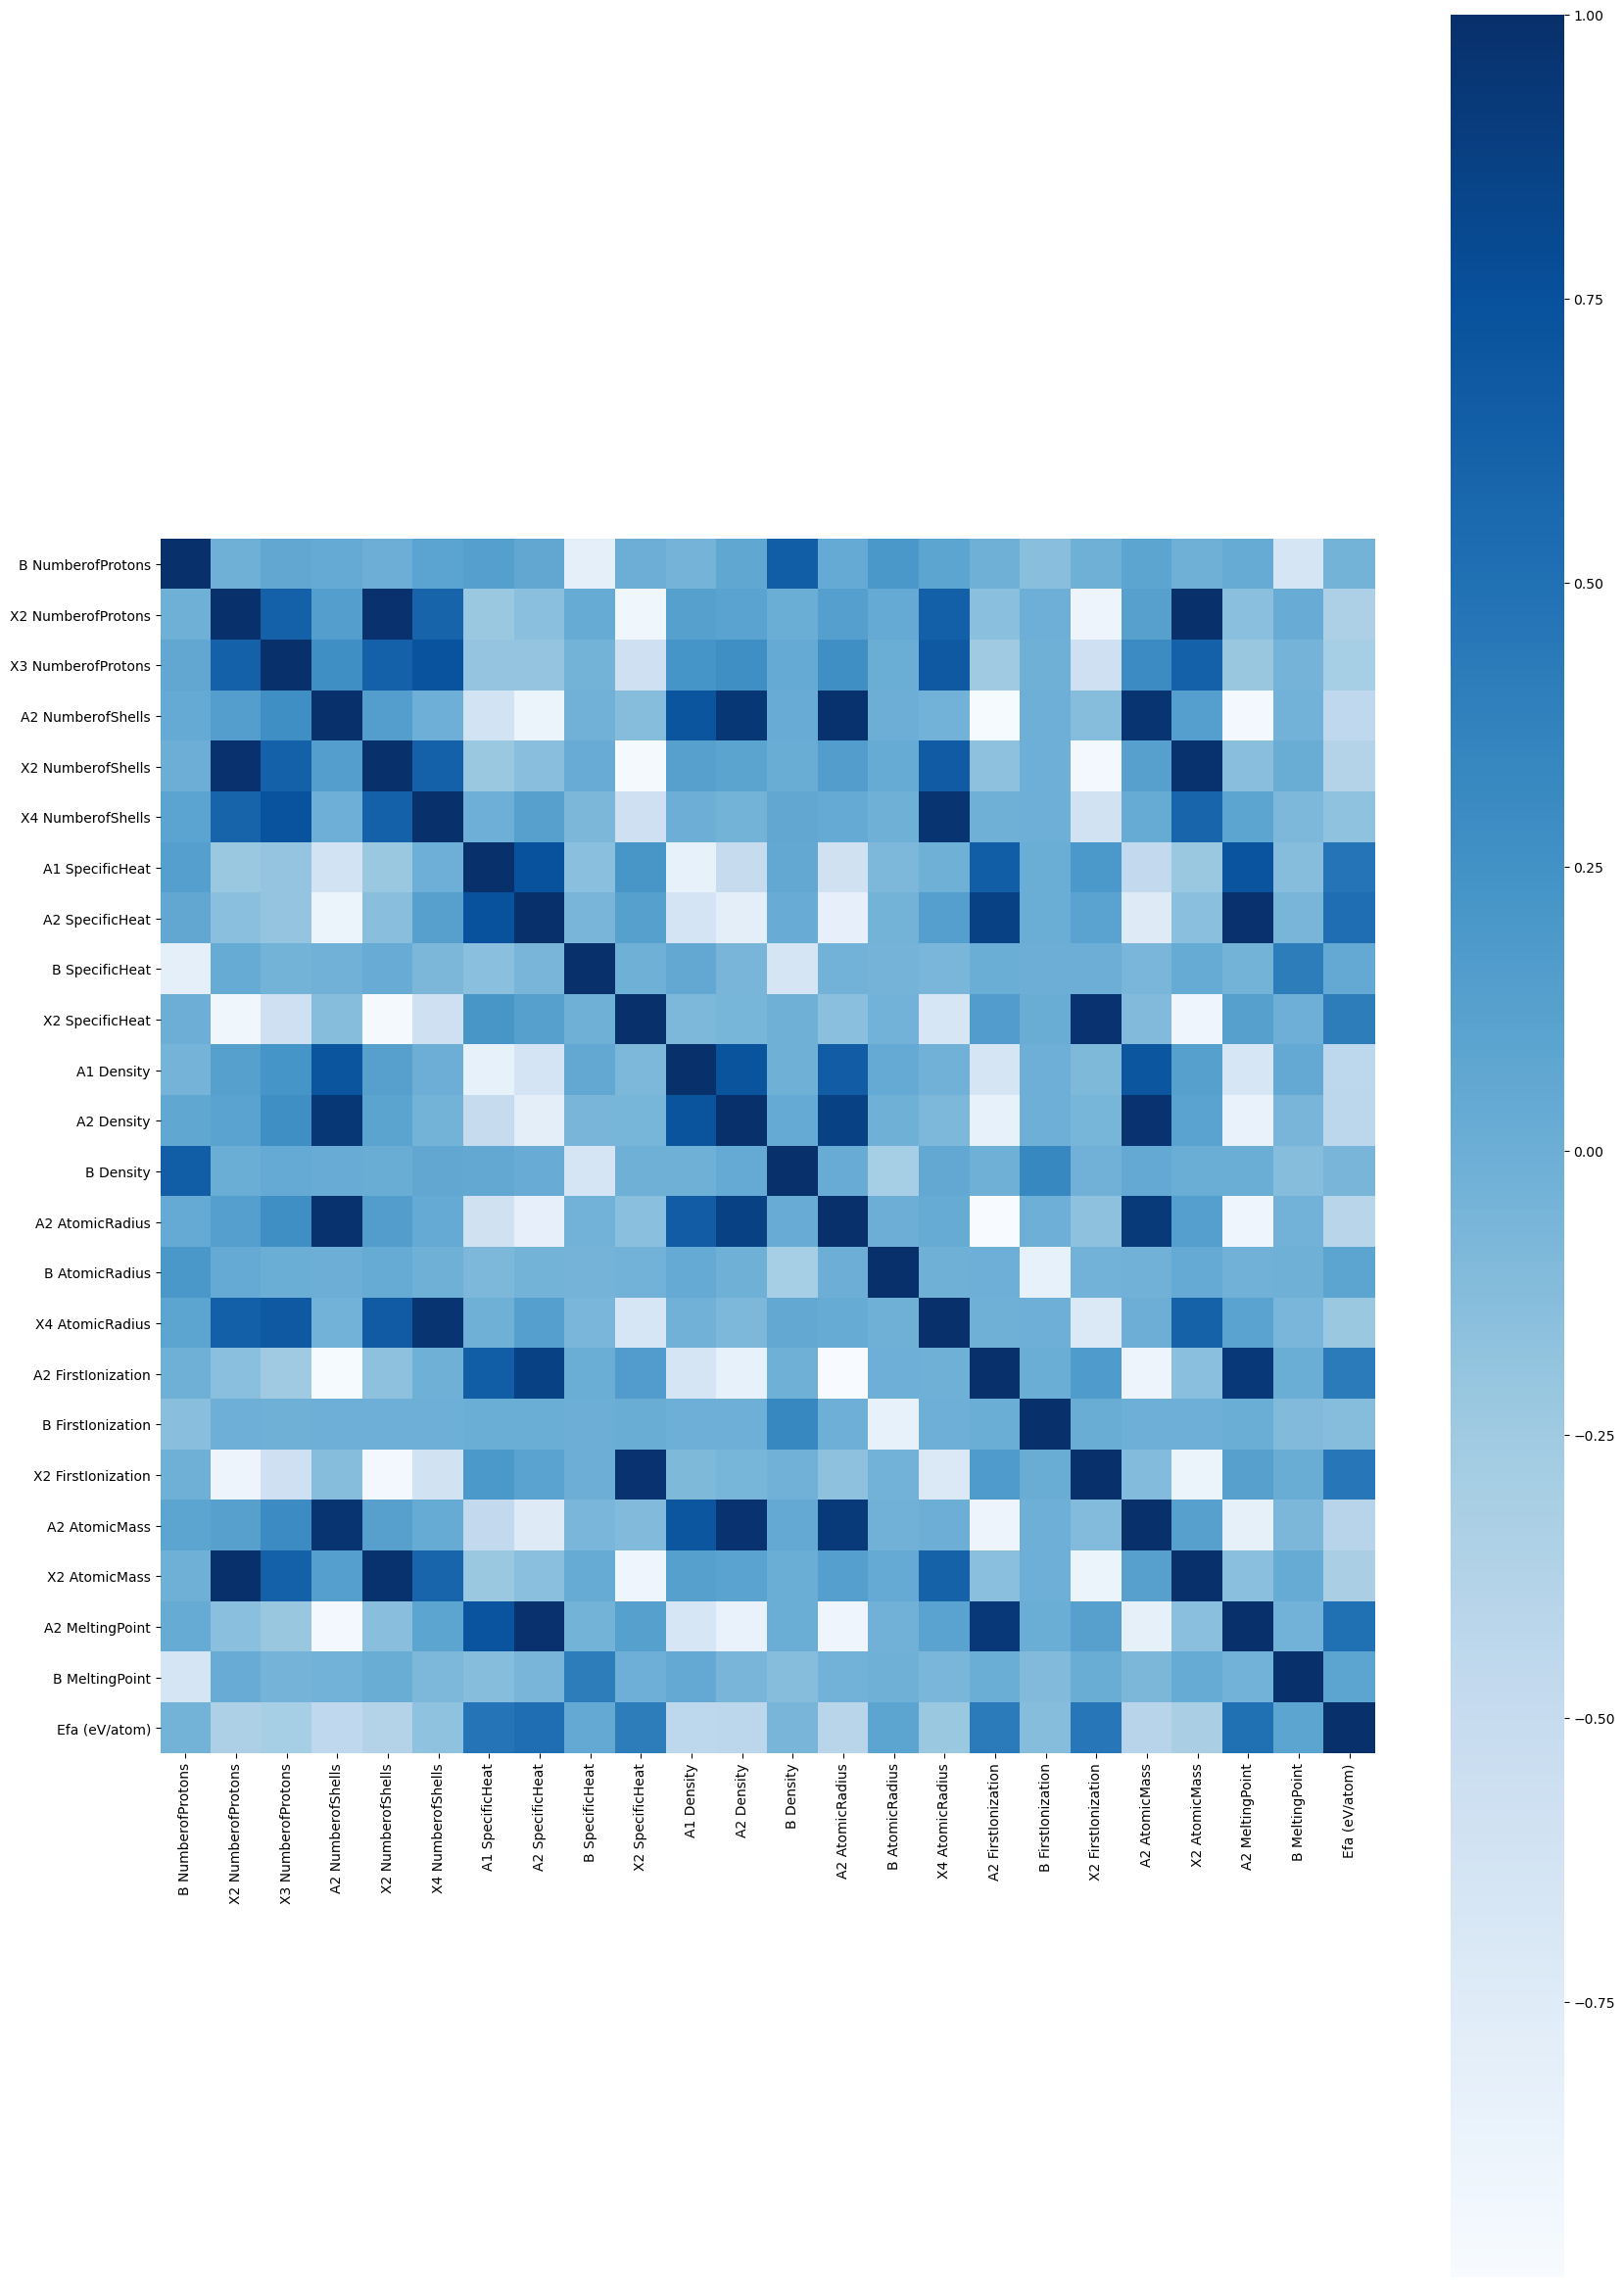

In [5]:
dataML.heatmap_afterRFE() 

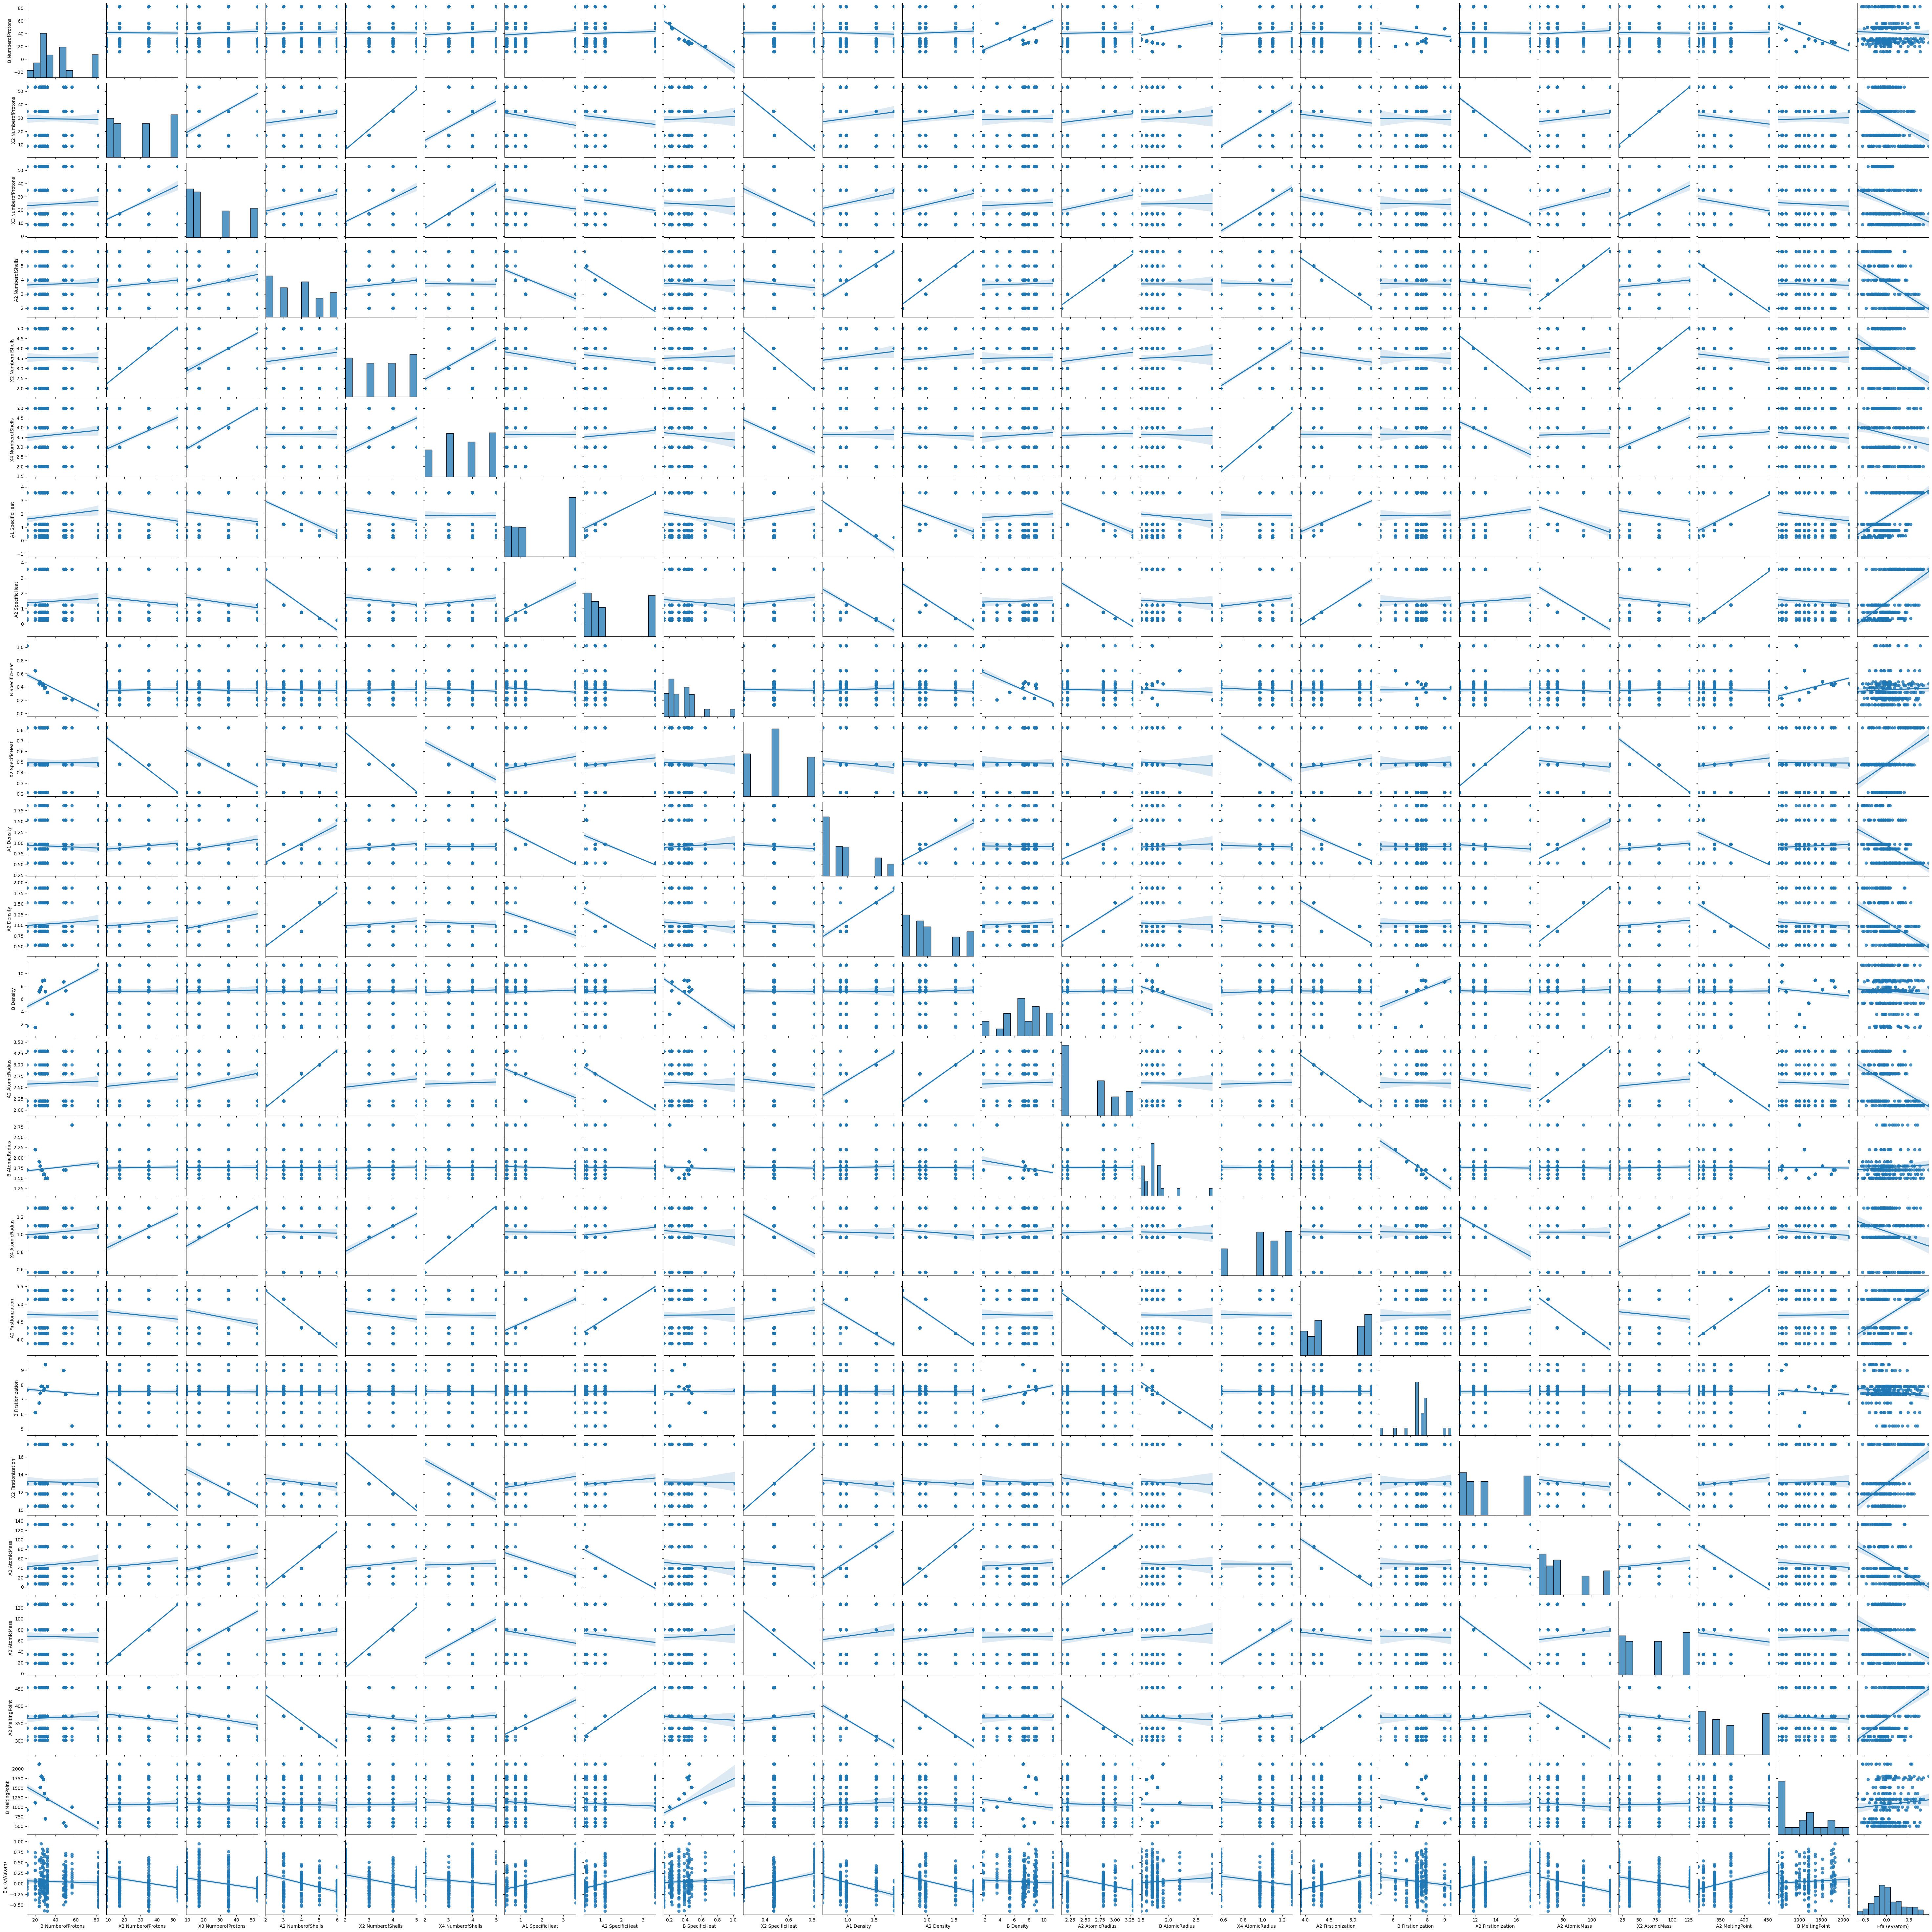

In [6]:
dataML.pairplot_afterRFE()#这里画图需要3分钟左右

这个图可以提取科学信息

特征与输出是正相关还是负相关

# 5 重要性排名（皮尔逊系数）
## 5.1 特征选择之前所有特征的重要性

                    Efa (eV/atom)
A2 SpecificHeat          0.518837
A2 MeltingPoint          0.506876
A1 SpecificHeat          0.475211
X2 FirstIonization       0.462445
A1 MeltingPoint          0.459693
...                           ...
A2 Density              -0.431418
X1 AtomicRadius         -0.436009
A1 Density              -0.437098
X2 AtomicRadius         -0.439406
A2 NumberofShells       -0.454113

[63 rows x 1 columns]


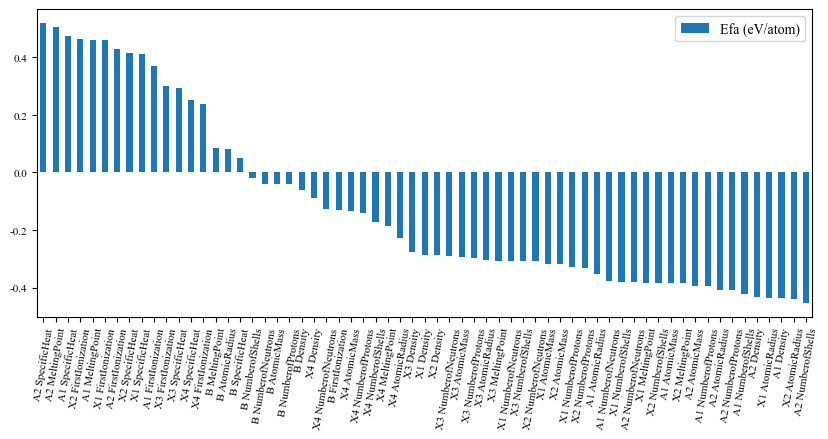

In [7]:
dataML.FeatureImportance_before(80,8,10,4)  #rotation=80, fontsize=8, figure_size_xaxis=10,figure_size_yaxis=4

这个图可以提取科学信息：

正相关，负相关，为什么正相关，为什么负相关

重要性排名前几名解释，哪些相关，哪些不相关，为什么相关，为什么不相关

## 5.2 特征选择之后的个别特征的重要性

                    Efa (eV/atom)
A2 SpecificHeat          0.518837
A2 MeltingPoint          0.506876
A1 SpecificHeat          0.475211
X2 FirstIonization       0.462445
A2 FirstIonization       0.429791
X2 SpecificHeat          0.415926
B MeltingPoint           0.083589
B AtomicRadius           0.082789
B SpecificHeat           0.048594
B NumberofProtons       -0.041833
B Density               -0.061085
B FirstIonization       -0.131298
X4 NumberofShells       -0.174016
X4 AtomicRadius         -0.227509
X3 NumberofProtons      -0.296698
X2 AtomicMass           -0.318384
X2 NumberofProtons      -0.330966
X2 NumberofShells       -0.383704
A2 AtomicMass           -0.394095
A2 AtomicRadius         -0.407830
A2 Density              -0.431418
A1 Density              -0.437098
A2 NumberofShells       -0.454113


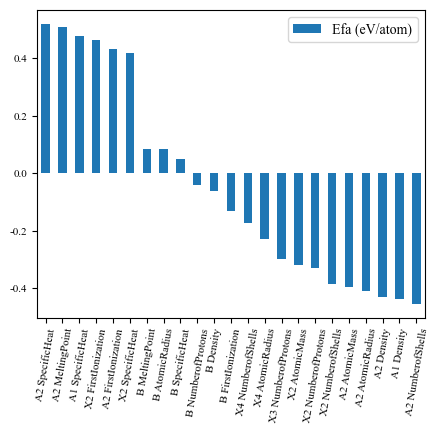

In [8]:
dataML.FeatureImportance_afterRFE(80,12,5,4) #rotation=80, fontsize=12, figure_size_xaxis=5,figure_size_yaxis=4

这个图可以快速提取科学信息：

正相关，负相关，为什么正相关，为什么负相关

重要性排名前几名解释，哪些相关，哪些不相关，为什么相关，为什么不相关

# 6 机器学习建模
## 6.1 xgboost建模和准确率画图
### 6.1.1 xgboost默认超参数建模画图
#### (n_estimators=2000, max_depth=100, eta=0.1, gamma=0,
#### subsample=0.9, colsample_bytree=0.9, learning_rate=0.2)

RMSE: 0.17691382175813797
MAE: 0.10986676300539383
R2: 0.6669212255104107
MSE: 0.03129850032907021


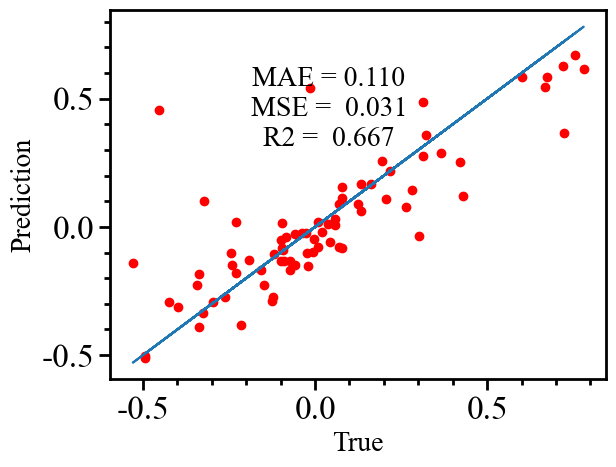

scores: [0.40581573 0.43908742 0.47872047 0.63662949 0.51112472 0.79018394
 0.92354221 0.79837156 0.72451205 0.53087135]
1 scores_mean: 0.4058157345009915
2 scores_mean: 0.42245157875476297
3 scores_mean: 0.44120787452475846
4 scores_mean: 0.490063277515685
5 scores_mean: 0.49427556526030497
6 scores_mean: 0.5435936279504133
7 scores_mean: 0.597871997382538
8 scores_mean: 0.6229344428765566
9 scores_mean: 0.6342208431371438
10 scores_mean: 0.6238858942374524


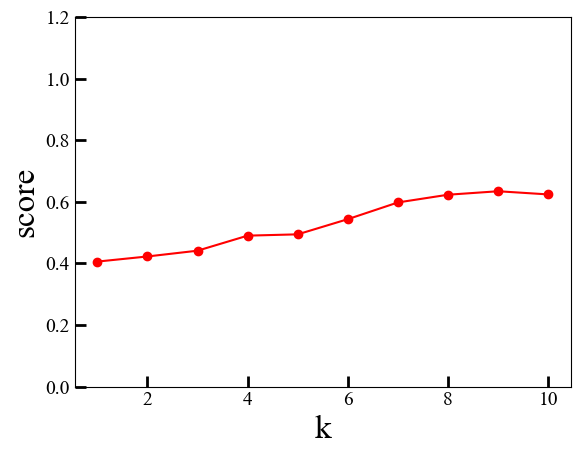

RMSE: 0.0008161109132532176
MAE: 0.0005987644047870282
R2: 0.9999937400021297
MSE: 6.66037022731001e-07


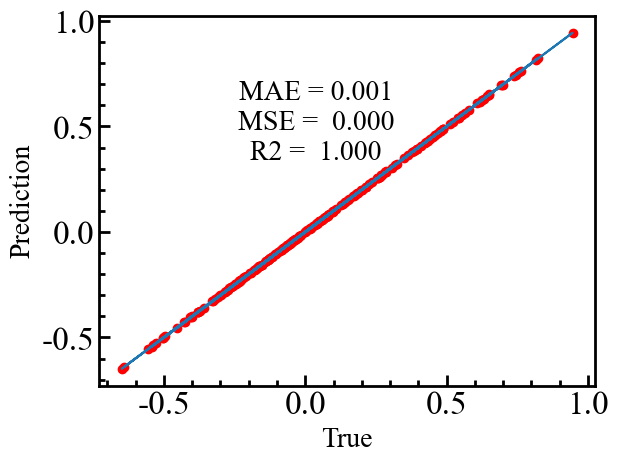

In [9]:
dataML.xgboost_default() #三个图，第一个图测试集拟合，第二个图交叉验证，第三个图训练集的拟合（没什么用）

### 6.1.2 xgboost自己修改超参数, 建模
画图得到拟合图以及交叉验证图
(n_estimators=2000xxx, max_depth=100xxx, eta=0.1xxx, gamma=0xxx,
subsample=0.9xxx, colsample_bytree=0.9xxx, learning_rate=0.2xxx)

RMSE: 0.17401433900064378
MAE: 0.1072279727235373
R2: 0.6777495728958186
MSE: 0.03028099017783098


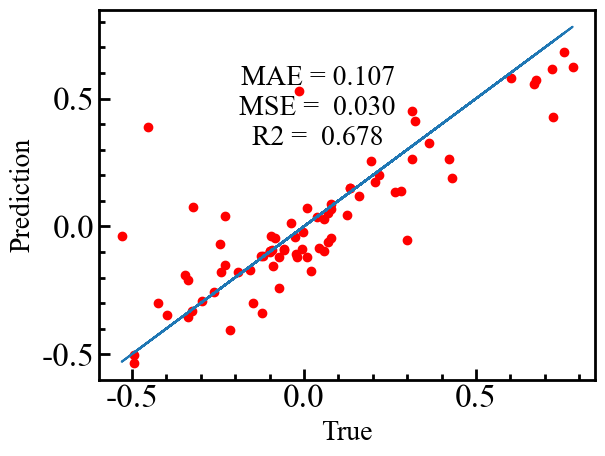

scores: [0.38892738 0.44243903 0.50336144 0.67353812 0.503406   0.83065022
 0.90667462 0.81978872 0.76209369 0.62000125]
1 scores_mean: 0.3889273811436338
2 scores_mean: 0.4156832062986625
3 scores_mean: 0.4449092825891814
4 scores_mean: 0.502066491759319
5 scores_mean: 0.5023343928701134
6 scores_mean: 0.5570536979398041
7 scores_mean: 0.6069995444925017
8 scores_mean: 0.6335981911679031
9 scores_mean: 0.6478754688236743
10 scores_mean: 0.6450880473756444


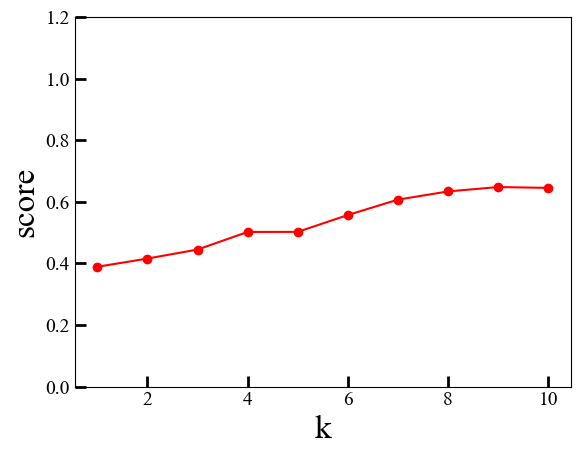

RMSE: 0.0008229287424034993
MAE: 0.0006116320334745061
R2: 0.9999936349726075
MSE: 6.772117150738048e-07


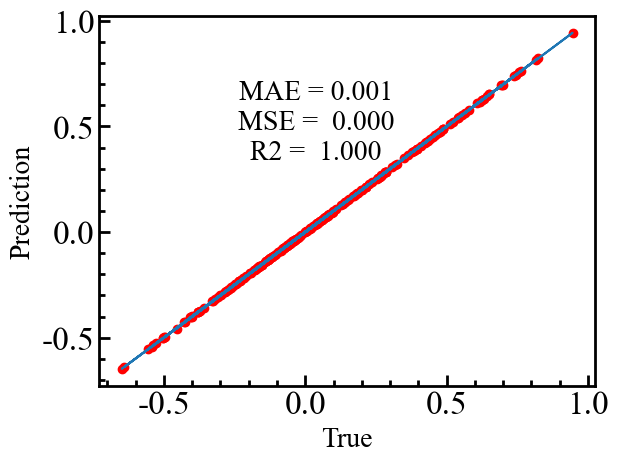

In [10]:
dataML.xgboost_modify(2000,200,0.2,0,0.9,0.8,0.2) #三个图，第一个图测试集拟合，第二个图交叉验证，第三个图训练集的拟合（没什么用）

#(n_estimators=1000, max_depth=200, eta=0.2, gamma=0, subsample=0.9, colsample_bytree=0.8, learning_rate=0.2)
#这里可以自己更改超参数，play with it, 观察准确率是否提升

第一个拟合图是基于测试集。
RMSE: 0.055163274701856106
MAE: 0.03133570165011043
R2: 0.8083609244543635
MSE: 0.0030429868758324375
上述为误差，相比于真实目标数值还行。
r2越大越好，这里也还行

第二个交叉验证图为10折交叉验证，准确率为不同k的准确率，大致看到大部分score接近1，平均score>0.8甚至>0.9, 因此10折交叉验证准确率还行。这里的score是R2。

### 6.1.3 xgboostRandomSearchCV随机超参数, 建模并观察准确率

RMSE: 0.17214957054460064
MAE: 0.11889178967487812
R2: 0.6846191520267784
MSE: 0.029635474638690436


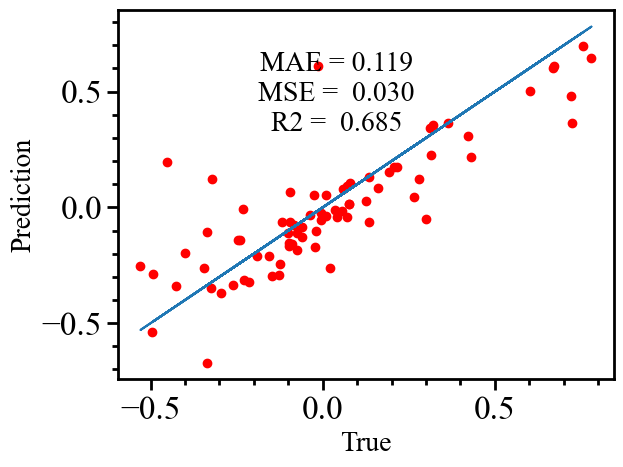

scores: [0.16342734 0.62291688 0.42514456 0.46660766 0.55942786 0.76394936
 0.90838076 0.82610743 0.73256914 0.64799881]
1 scores_mean: 0.16342734017532767
2 scores_mean: 0.3931721113983676
3 scores_mean: 0.4038295932936388
4 scores_mean: 0.419524110433632
5 scores_mean: 0.4475048610415877
6 scores_mean: 0.500245611043838
7 scores_mean: 0.558550631895336
8 scores_mean: 0.5919952321987444
9 scores_mean: 0.6076145547465839
10 scores_mean: 0.6116529803015582


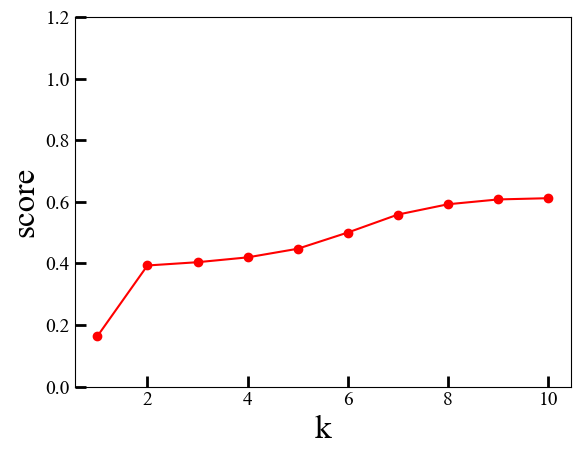

RMSE: 0.05549062748407951
MAE: 0.04069489678429389
R2: 0.9710588965061515
MSE: 0.003079209738576881


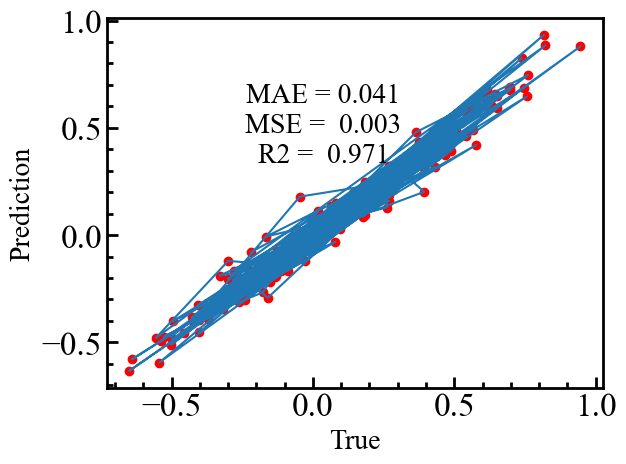

In [7]:
dataML.xgboost_RandomSearchCV() 

#比较慢，尤其是交叉验证，可能需要1小时以上，请耐心等待，默认：
#         'n_estimators': range(80, 200, 40),
#         'max_depth': range(2, 15, 4),
#         'learning_rate': np.linspace(0.01, 2, 4),
#         'subsample': np.linspace(0.7, 0.9, 4),
#         'colsample_bytree': np.linspace(0.5, 0.98, 4),
#         'min_child_weight': range(1, 9, 3)
#保存的模型为 rnd_search_cv_xgboost，建立预测集输出时会使用到

### 6.1.4 xgboost SearchCV网格搜索（并非随机）寻找最优超参数, 建模并观察准确率

In [ ]:
# dataML.xgboost_GridSearchCV() #非常慢，请耐心等待


#  这里暂时设置的参数如下，后面更能需要更新
#     param_distribs = {
#         'n_estimators': range(80, 200, 30),
#         'max_depth': range(2, 15, 3),
#         'learning_rate': np.linspace(0.01, 2, 4),
#         'subsample': np.linspace(0.7, 0.9, 4),
#         'colsample_bytree': np.linspace(0.5, 0.98, 4),
#         'min_child_weight': range(1, 9, 3)
#     }

## 6.2 Random forest 随机森林建模画图
### 6.2.1 Random forest 默认超参数建模画图

RMSE: 0.18314346148703448
MAE: 0.12327481297727269
R2: 0.6430509209098769
MSE: 0.03354152748545288


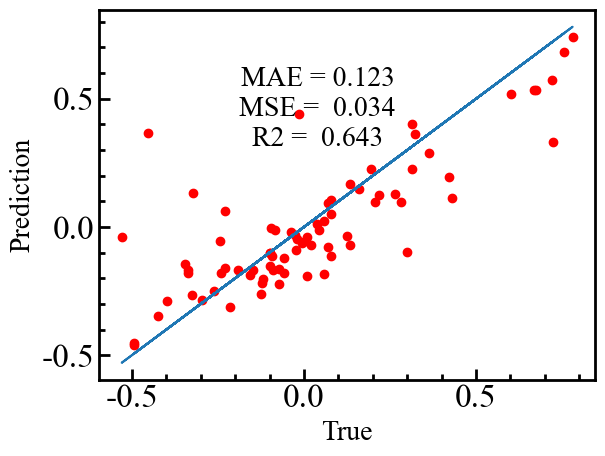

scores: [0.5771727  0.49581371 0.52696699 0.63073634 0.42987385 0.76734317
 0.91392478 0.81799032 0.83646915 0.45878539]
1 scores_mean: 0.5771726971423983
2 scores_mean: 0.5364932031554753
3 scores_mean: 0.5333177973691782
4 scores_mean: 0.557672433535899
5 scores_mean: 0.53211271598165
6 scores_mean: 0.5713177916356375
7 scores_mean: 0.6202616475817725
8 scores_mean: 0.6449777317741286
9 scores_mean: 0.666254556530972
10 scores_mean: 0.6455076402691662


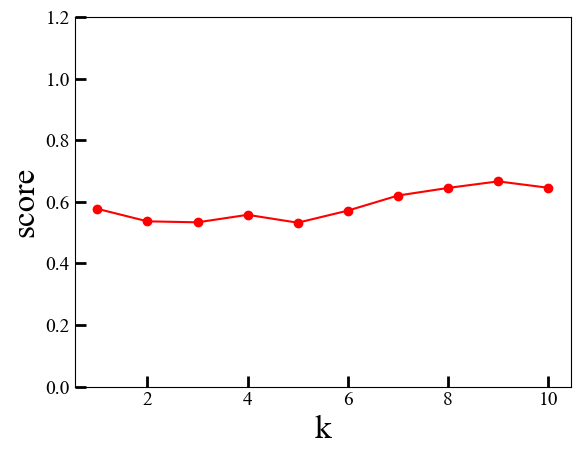

RMSE: 0.06264525850643315
MAE: 0.04349404534947368
R2: 0.9631147929153075
MSE: 0.003924428413337835


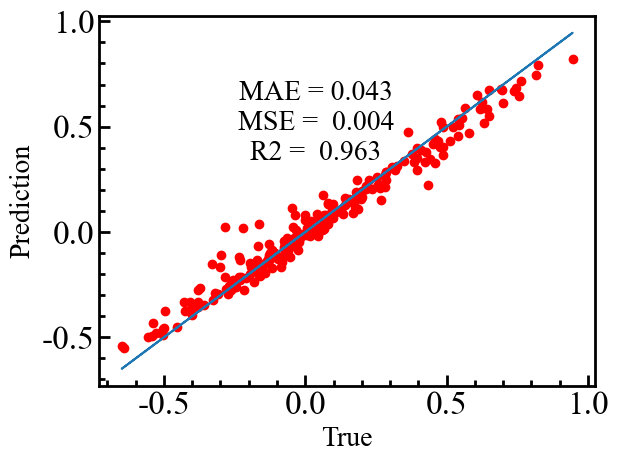

In [11]:
dataML.RandomForest_default() #三个图，第一个图测试集拟合，第二个图交叉验证，第三个图训练集的拟合

### 6.2.2 Random forest 自己修改超参数建模画图

RMSE: 0.1784011925467054
MAE: 0.12564960709090908
R2: 0.6612970840367458
MSE: 0.03182698550208665


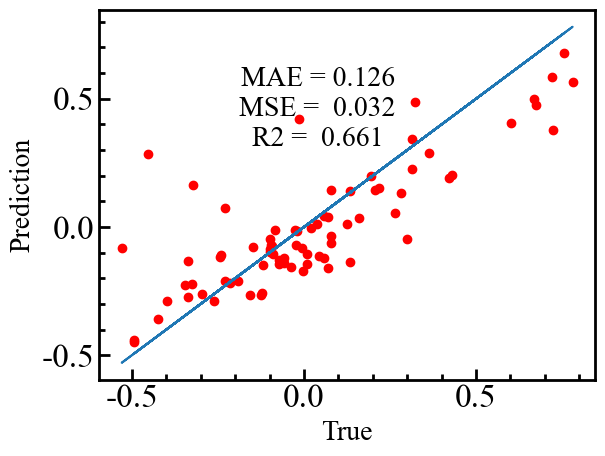

scores: [0.53432282 0.45780685 0.62831863 0.62661112 0.26983049 0.75627629
 0.92404795 0.80966289 0.86825042 0.57914841]
1 scores_mean: 0.5343228163030148
2 scores_mean: 0.4960648349697487
3 scores_mean: 0.54014943440793
4 scores_mean: 0.5617648563588431
5 scores_mean: 0.5033779838906127
6 scores_mean: 0.5455277015165183
7 scores_mean: 0.5996020233335455
8 scores_mean: 0.625859632248774
9 scores_mean: 0.6527919425163368
10 scores_mean: 0.6454275894563372


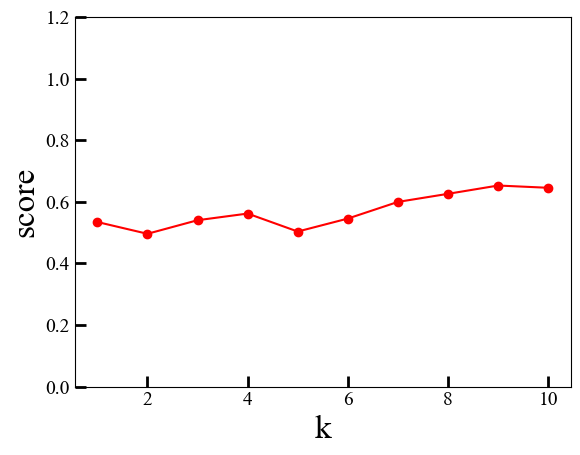

RMSE: 0.07554632377888733
MAE: 0.04790468208596492
R2: 0.9463583058084329
MSE: 0.005707247036504478


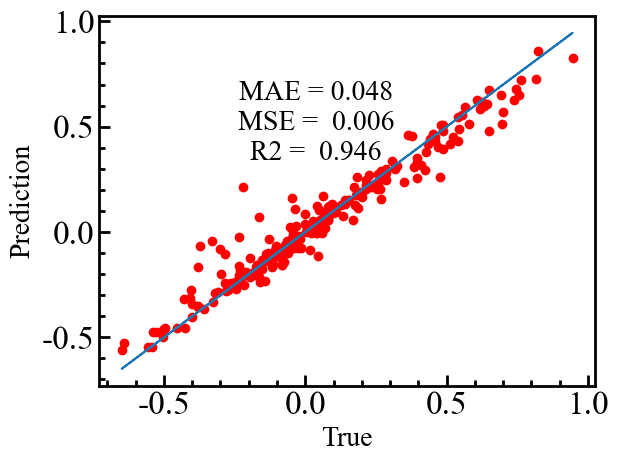

In [12]:
dataML.RandomForest_modify(20, 0.3, 2, 10, 10) # max_depth=20, max_features=0.3, min_samples_split=2, n_estimators=10, random_state=10 可以自己修改

### 6.2.3 Random forest RandomSearchCV 随机搜索超参数建模画图
param_distribs = {'bootstrap': [True, False],
           'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 200, None],
           'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 2, 4],
           'min_samples_split': [2, 5, 10],
           'n_estimators': [130, 180, 230]}
           
RandomizedSearchCV(clf, param_distribs, n_iter=300, cv=10, scoring='neg_mean_squared_error')

In [14]:
# dataML.RandomForest_RandomSearchCV()  #需要很长时间,disabled，待添加

## 6.3  Bagging建模画图
### 6.3.1  Bagging 默认建模画图

RMSE: 0.18001311673591824
MAE: 0.11879779745844157
R2: 0.6551488076564302
MSE: 0.032404722196979326


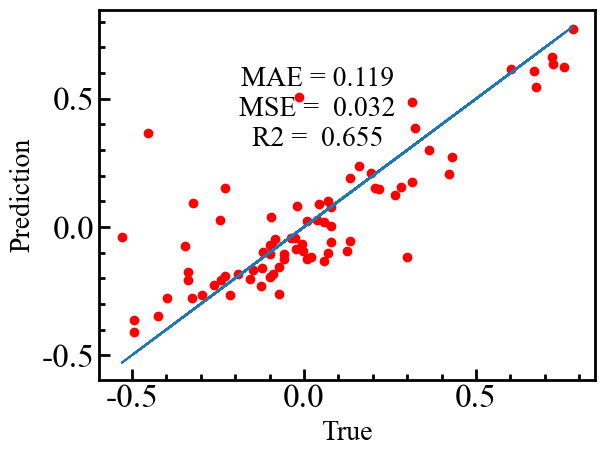

scores: [0.45662504 0.33218945 0.43956553 0.72155763 0.54441226 0.72400308
 0.90418977 0.78055122 0.72643135 0.4676122 ]
1 scores_mean: 0.4566250375991424
2 scores_mean: 0.3944072431365259
3 scores_mean: 0.40946000453346176
4 scores_mean: 0.4874844107818437
5 scores_mean: 0.49886998102464875
6 scores_mean: 0.5363921639806725
7 scores_mean: 0.5889346791171397
8 scores_mean: 0.6128867467609318
9 scores_mean: 0.62550281360283
10 scores_mean: 0.6097137522364117


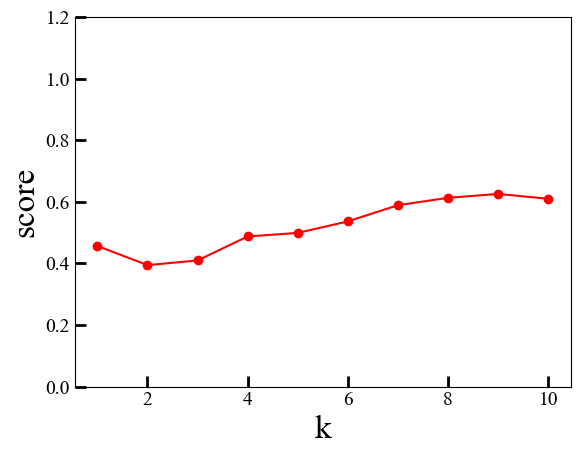

RMSE: 0.0678994929077832
MAE: 0.04563927947543859
R2: 0.9566679858406099
MSE: 0.004610341137134101


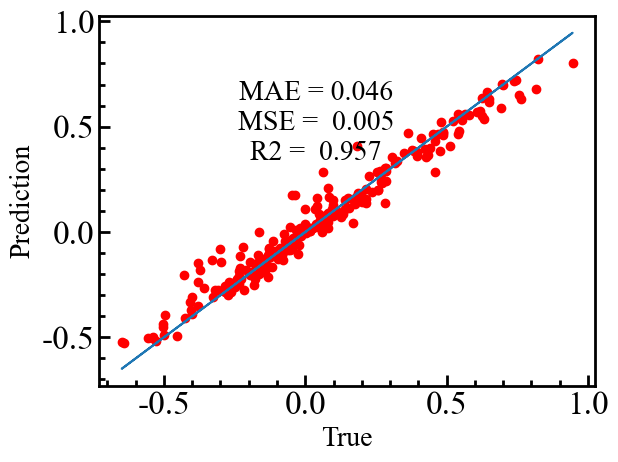

In [15]:
dataML.Bagging_default()

## 6.4  AdaBoost建模画图
### 6.4.1  AdaBoost默认建模画图

RMSE: 0.2062004820012226
MAE: 0.16308566558931983
R2: 0.5475164641088694
MSE: 0.042518638777536526


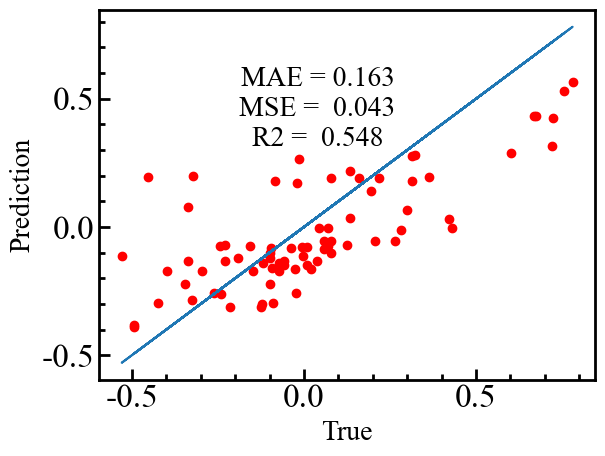

scores: [0.4954378  0.50848135 0.40231414 0.5692865  0.35685927 0.69129306
 0.82275938 0.67705748 0.70524498 0.50407771]
1 scores_mean: 0.4954378021251997
2 scores_mean: 0.5019595778119847
3 scores_mean: 0.4687444324640253
4 scores_mean: 0.49387994949031716
5 scores_mean: 0.4664758139914845
6 scores_mean: 0.5039453543750637
7 scores_mean: 0.5494902152957156
8 scores_mean: 0.5654361229579088
9 scores_mean: 0.5809704400129703
10 scores_mean: 0.5732811674604029


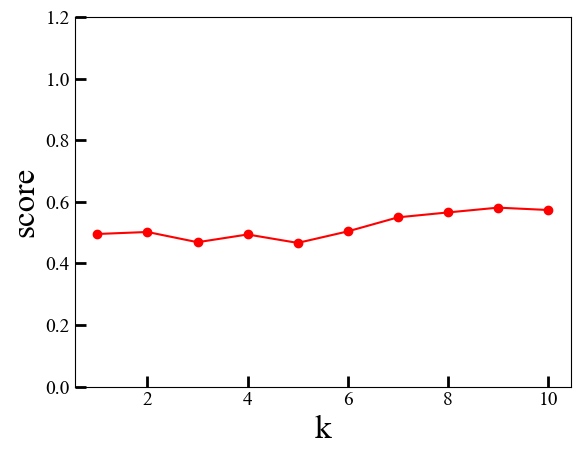

RMSE: 0.15399155815769452
MAE: 0.12808846133663265
R2: 0.7771207480525938
MSE: 0.023713399983834618


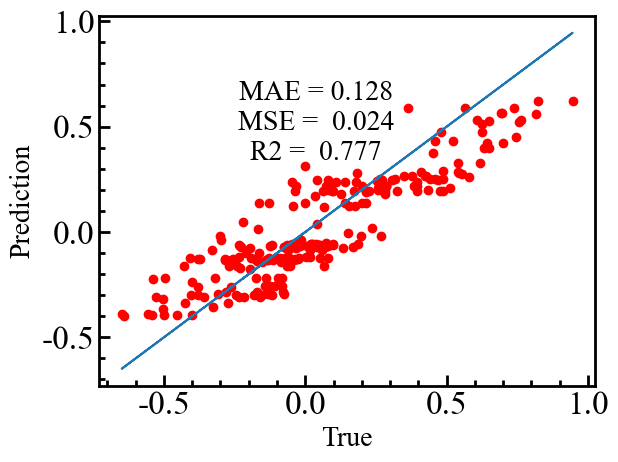

In [16]:
dataML.AdaBoost_default()

## 6.5  GradientBoosting建模画图
### 6.5.1  GradientBoosting默认建模画图

RMSE: 0.1849248534952709
MAE: 0.12032947851394997
R2: 0.6360732358760397
MSE: 0.03419720144024741


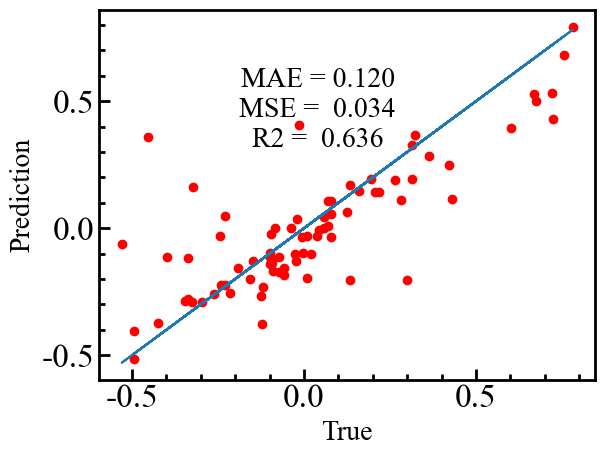

scores: [0.59100835 0.59854352 0.57314513 0.69382566 0.50519901 0.71424387
 0.92773032 0.82585767 0.62378127 0.47355797]
1 scores_mean: 0.5910083470230572
2 scores_mean: 0.594775931662348
3 scores_mean: 0.5875656657964852
4 scores_mean: 0.614130664036618
5 scores_mean: 0.5923443339581935
6 scores_mean: 0.6126609239771309
7 scores_mean: 0.6576708371046729
8 scores_mean: 0.6786941907654573
9 scores_mean: 0.6725927550854718
10 scores_mean: 0.6526892764425721


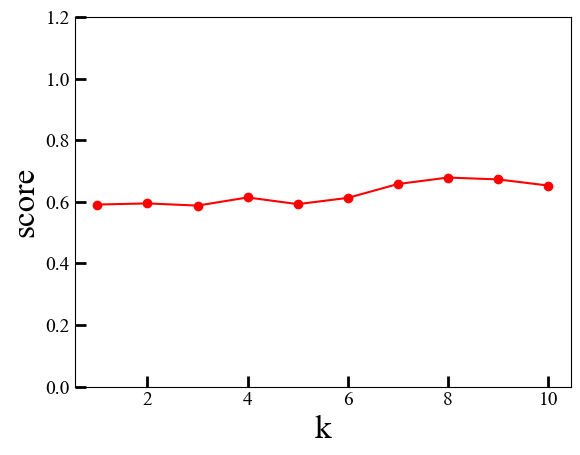

RMSE: 0.09419536044989302
MAE: 0.0669999618189582
R2: 0.9166059934638429
MSE: 0.008872765930285268


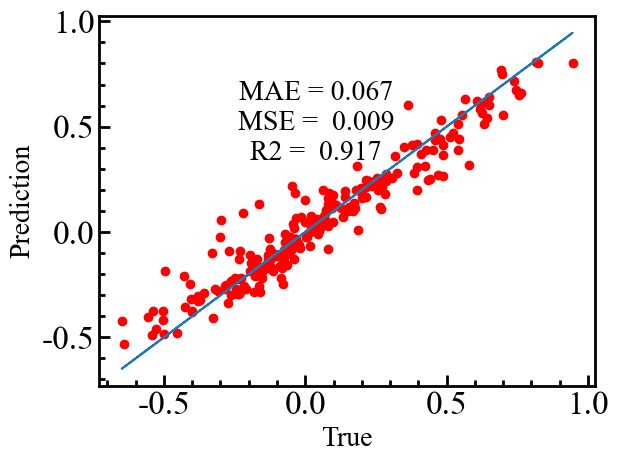

In [17]:
dataML.GradientBoosting_default()

## 6.6 ExtraTree建模画图
### 6.6.1 ExtraTree默认建模画图

RMSE: 0.20234323783524075
MAE: 0.13245710793506493
R2: 0.5642866972027976
MSE: 0.040942785897648805


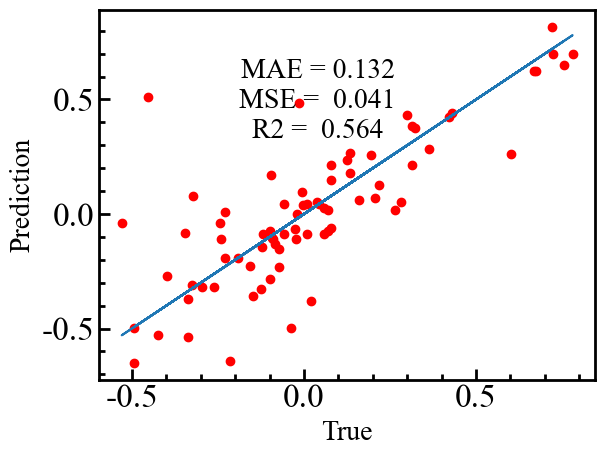

scores: [ 0.1231442   0.12233142  0.38044693  0.2192204   0.63122295  0.76061996
  0.65337048  0.50943074  0.22580697 -0.32942162]
1 scores_mean: 0.12314420246404623
2 scores_mean: 0.12273781194803873
3 scores_mean: 0.2086408526443826
4 scores_mean: 0.21128574050605575
5 scores_mean: 0.2952731814349199
6 scores_mean: 0.37283097757777933
7 scores_mean: 0.4129080490830308
8 scores_mean: 0.4249733849779106
9 scores_mean: 0.40284378335042087
10 scores_mean: 0.3296172428164786


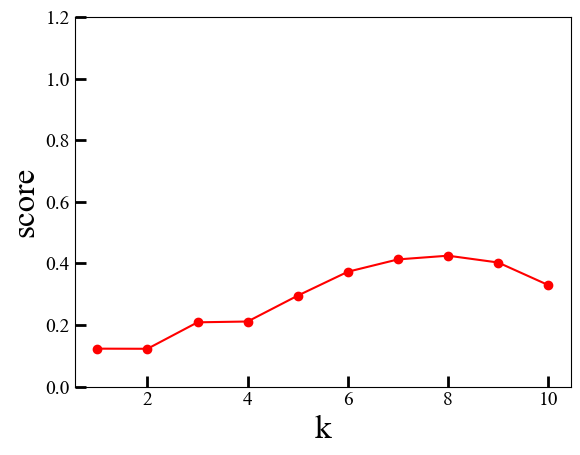

RMSE: 0.0
MAE: 0.0
R2: 1.0
MSE: 0.0


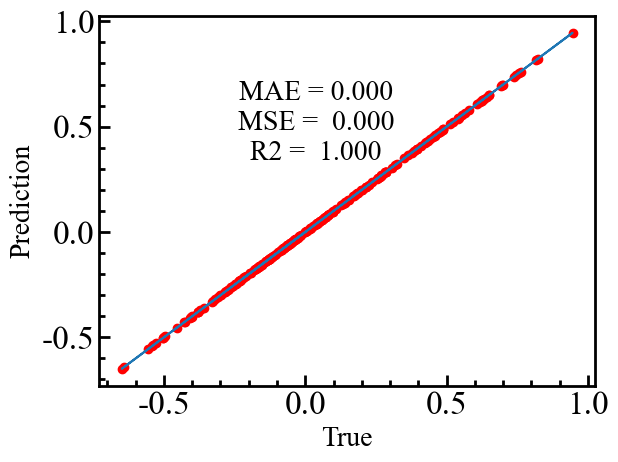

In [18]:
dataML.ExtraTree_default()

## 6.7 svm建模画图
### 6.7.1 svm默认建模画图

RMSE: 0.21559720666381071
MAE: 0.15100183542134263
R2: 0.5053367019547432
MSE: 0.046482155521237904


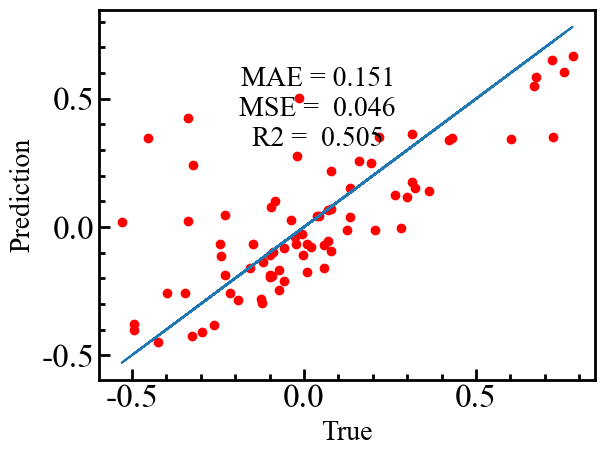

scores: [0.4966005  0.33484458 0.54516287 0.64700976 0.2471718  0.72443839
 0.74534596 0.55300164 0.75814233 0.30242459]
1 scores_mean: 0.49660050076009254
2 scores_mean: 0.4157225414211975
3 scores_mean: 0.4588693181186085
4 scores_mean: 0.5059044291986339
5 scores_mean: 0.4541579023688308
6 scores_mean: 0.4992046509847718
7 scores_mean: 0.5343676952503006
8 scores_mean: 0.5366969377565931
9 scores_mean: 0.5613019816523963
10 scores_mean: 0.5354142425657022


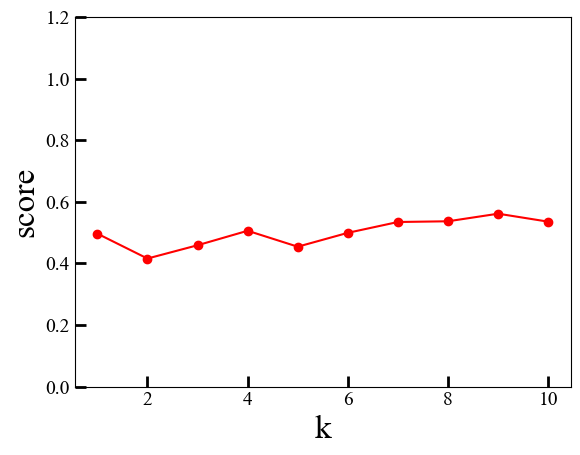

RMSE: 0.1609215366718847
MAE: 0.11038435575004242
R2: 0.7566092007556061
MSE: 0.025895740964840732


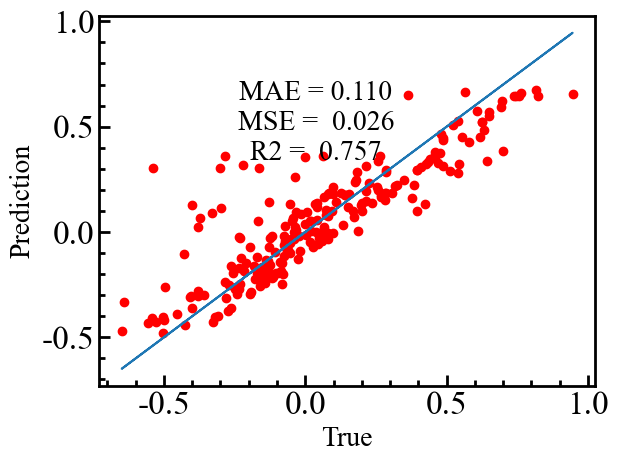

In [19]:
dataML.svm_default()

## 6.8 DecisionTree建模画图
### 6.8.1 DecisionTree默认建模画图

RMSE: 0.22813094919011137
MAE: 0.14801160275324676
R2: 0.4461504027729475
MSE: 0.05204372997838117


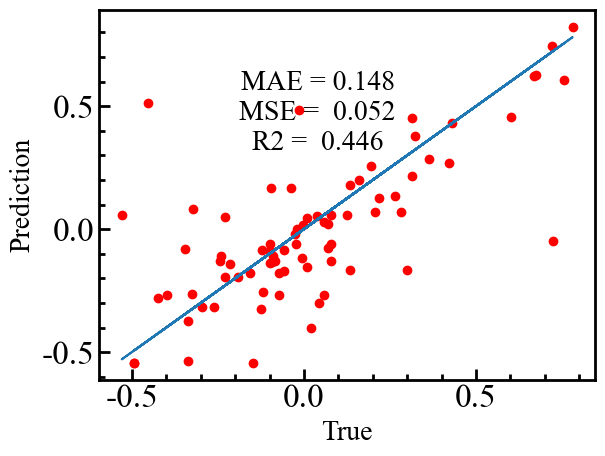

scores: [0.34193885 0.28699313 0.4975861  0.30126653 0.45248868 0.5529467
 0.8201395  0.6929148  0.39742588 0.26425324]
1 scores_mean: 0.34193885047716643
2 scores_mean: 0.314465989665257
3 scores_mean: 0.37550602703631536
4 scores_mean: 0.3569461532862811
5 scores_mean: 0.37605465925531334
6 scores_mean: 0.4055366661475519
7 scores_mean: 0.46476564235151435
8 scores_mean: 0.4932842871066826
9 scores_mean: 0.48263335243019284
10 scores_mean: 0.4607953412645389


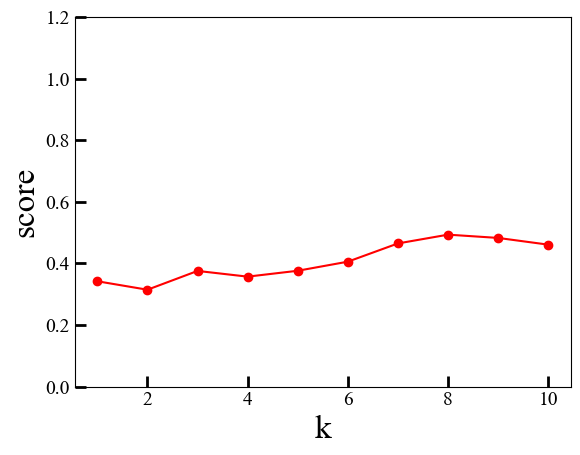

RMSE: 0.0
MAE: 0.0
R2: 1.0
MSE: 0.0


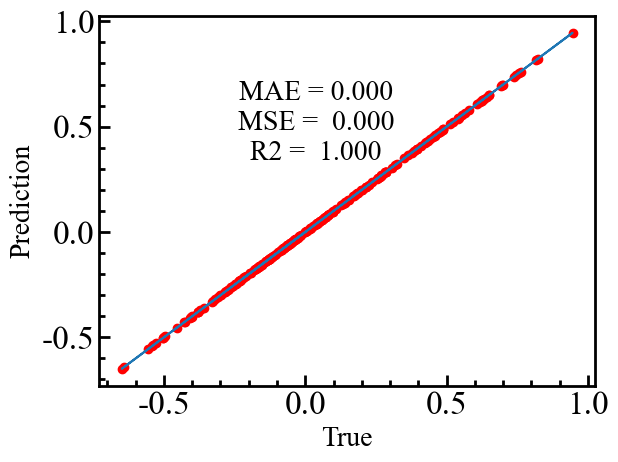

In [20]:
dataML.DecisionTree_default()

## 6.9 LinearRegression建模画图
### 6.9.1 LinearRegression默认建模画图

RMSE: 0.22959150582252585
MAE: 0.16869671937865263
R2: 0.43903590825394356
MSE: 0.05271225954585492


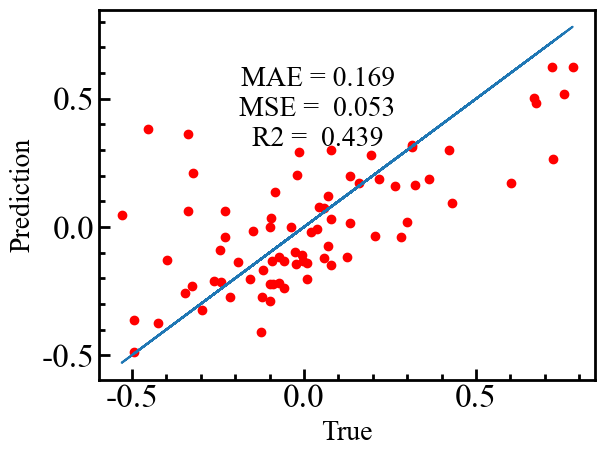

scores: [0.53169929 0.47530165 0.47119199 0.6072977  0.27269411 0.60077085
 0.71960963 0.55125914 0.79514768 0.49671145]
1 scores_mean: 0.5316992884150662
2 scores_mean: 0.5035004710243697
3 scores_mean: 0.49273097791697157
4 scores_mean: 0.5213726577691826
5 scores_mean: 0.4716369489879756
6 scores_mean: 0.49315926545707783
7 scores_mean: 0.5255093173461282
8 scores_mean: 0.528728045654284
9 scores_mean: 0.5583302272690074
10 scores_mean: 0.552168349838472


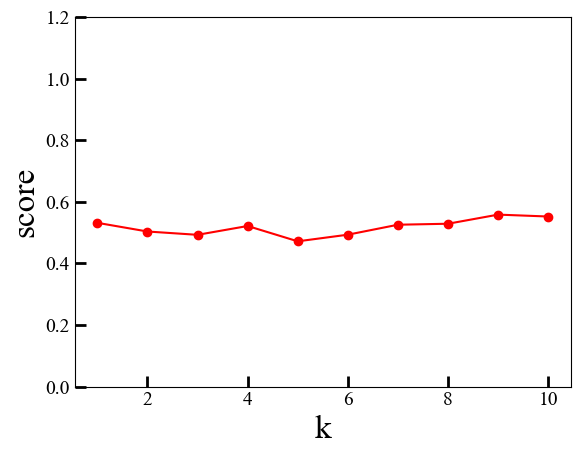

RMSE: 0.1933000336387165
MAE: 0.14529527738791803
R2: 0.6488119950551814
MSE: 0.03736490300472893


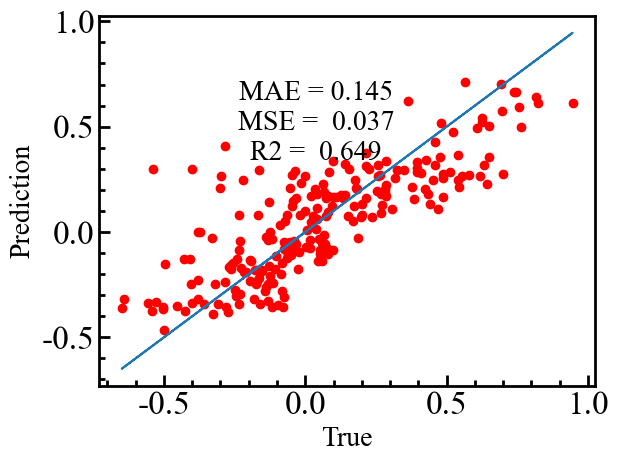

In [21]:
dataML.LinearRegression_default()

In [22]:
## 6.10 Ridge建模画图
### 6.10.1 Ridge默认建模画图

RMSE: 0.23305287570316727
MAE: 0.1738931572943963
R2: 0.42199398002551736
MSE: 0.05431364287351593


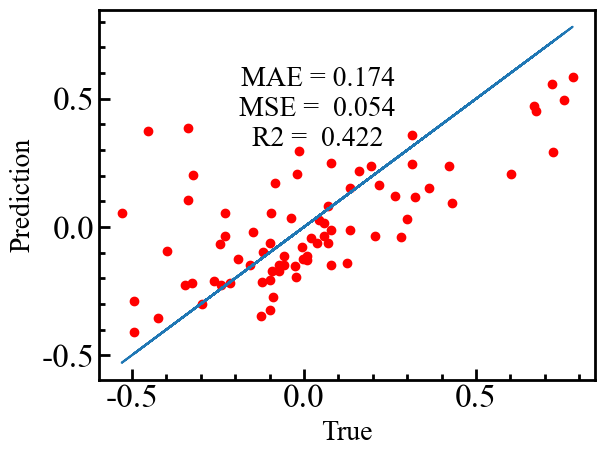

scores: [0.52512267 0.39898547 0.46206739 0.67061145 0.32848229 0.56535331
 0.71763045 0.53708448 0.79359596 0.49720768]
1 scores_mean: 0.5251226732335719
2 scores_mean: 0.4620540741054675
3 scores_mean: 0.4620585134784864
4 scores_mean: 0.5141967484184122
5 scores_mean: 0.4770538561706645
6 scores_mean: 0.4917704319385998
7 scores_mean: 0.524036149034333
8 scores_mean: 0.5256671900730676
9 scores_mean: 0.5554370531149858
10 scores_mean: 0.549614115858504


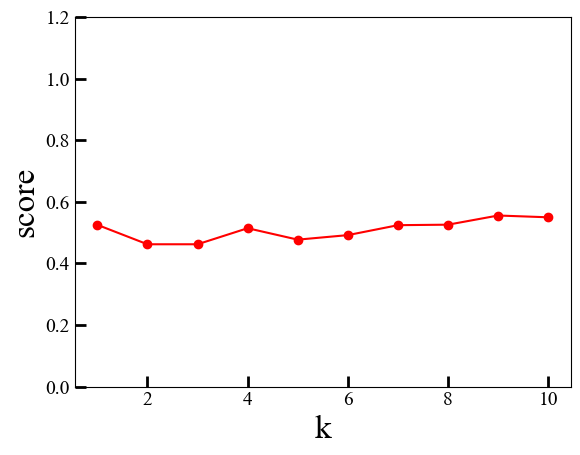

RMSE: 0.19791484072888527
MAE: 0.15091244061981998
R2: 0.6318434453632948
MSE: 0.03917028418074002


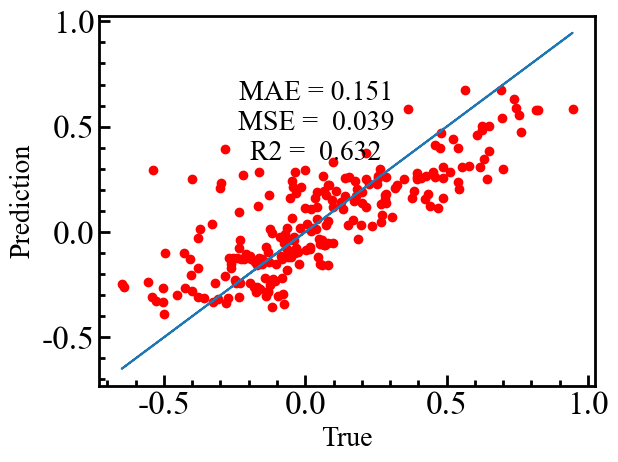

In [23]:
dataML.Ridge_default()

## 6.11 MLP建模画图
### 6.11.1 MLP默认建模画图

RMSE: 0.23387245125070427
MAE: 0.17110796900751638
R2: 0.4179214916496269
MSE: 0.05469632345401304


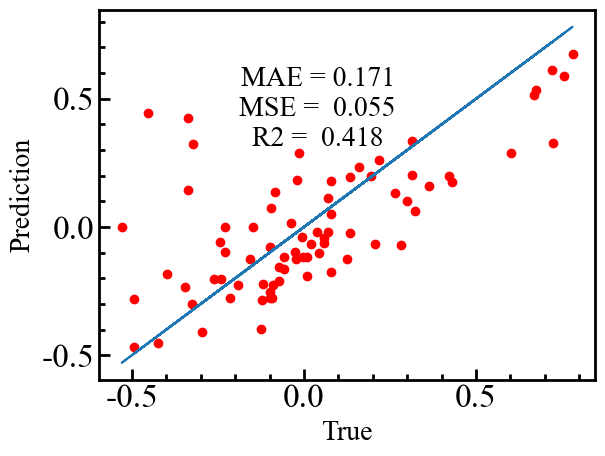

scores: [0.36450478 0.35473384 0.46776967 0.4624263  0.31453755 0.59969996
 0.70475961 0.46452928 0.78135876 0.51640078]
1 scores_mean: 0.3645047791786147
2 scores_mean: 0.3596193085206523
3 scores_mean: 0.3956694280681989
4 scores_mean: 0.4123586455985174
5 scores_mean: 0.3927944259452522
6 scores_mean: 0.4272786822266044
7 scores_mean: 0.4669188144129976
8 scores_mean: 0.46662012240792533
9 scores_mean: 0.5015910817080657
10 scores_mean: 0.50307205134626


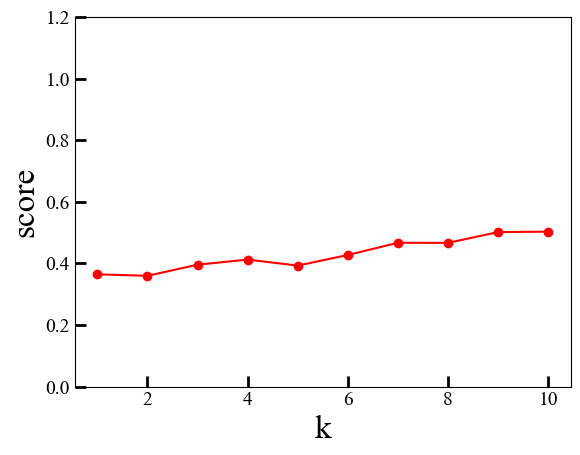

RMSE: 0.1811497348865036
MAE: 0.13294841359986007
R2: 0.6915738304703627
MSE: 0.032815226449450535


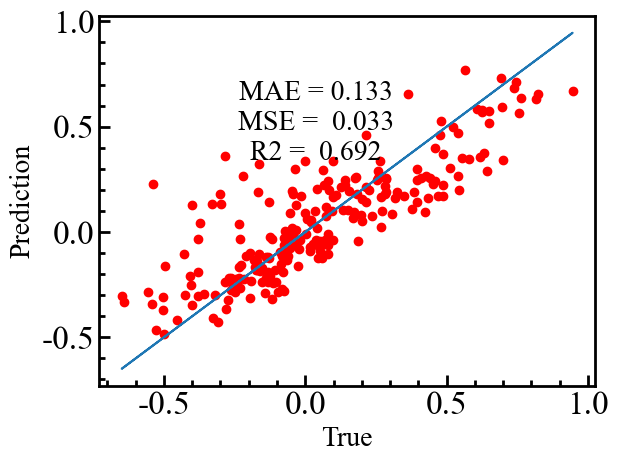

In [24]:
dataML.MLP_default()

### 6.11.2 MLP_modify手动修改超参数建模画图

RMSE: 0.18392088574600501
MAE: 0.1251051394198852
R2: 0.6400140682513532
MSE: 0.033826892213595035


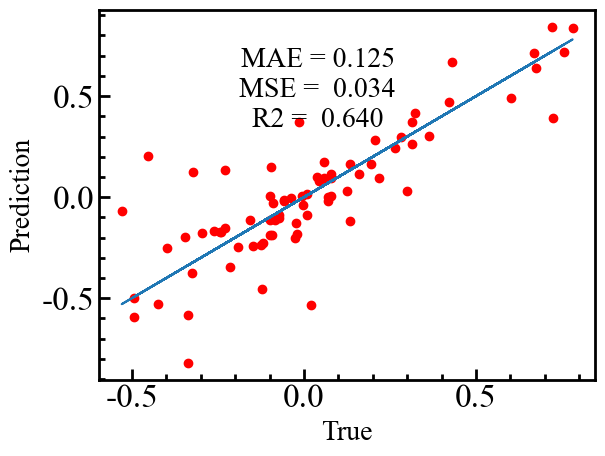

scores: [-0.0943575   0.30389873  0.0504902   0.09399495  0.48790592  0.61090549
  0.76550311  0.58850076  0.2972937   0.6009883 ]
1 scores_mean: -0.09435749992633213
2 scores_mean: 0.10477061460257608
3 scores_mean: 0.08667714347432065
4 scores_mean: 0.08850659615985507
5 scores_mean: 0.16838646102574722
6 scores_mean: 0.24213963257094648
7 scores_mean: 0.31690584396805355
8 scores_mean: 0.3508552082422357
9 scores_mean: 0.3449039290635588
10 scores_mean: 0.3705123664028669


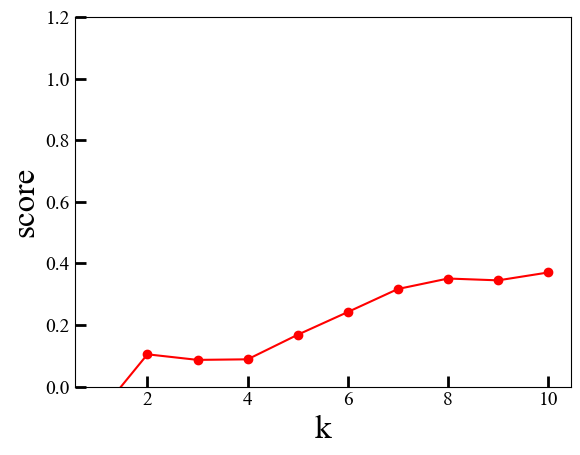

RMSE: 0.007135586929463137
MAE: 0.003790608650234804
R2: 0.9995214412985076
MSE: 5.091660082792516e-05


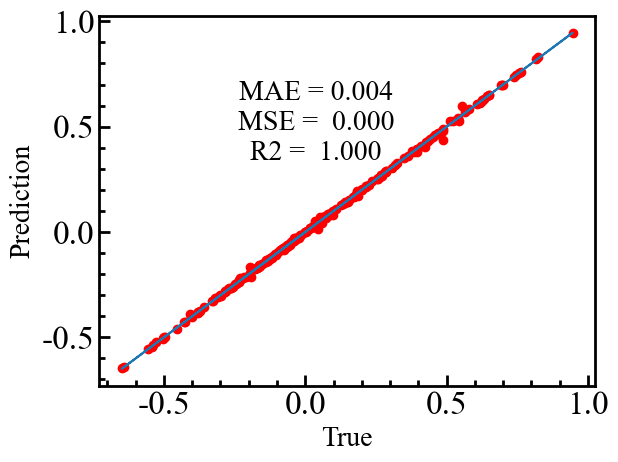

In [25]:
dataML.MLP_modify(0.01,0.0001,200000,200,200)
# #   MLPRegressor(solver='lbfgs', activation='relu', learning_rate_init=0.01, alpha=0.0001, max_iter=200000, hidden_layer_sizes=(200, 200))

比较上述算法，选取最准确的机器学习模型

# 7. 简单的预测集建立

## 7.1 基于xgboost_default预测

In [27]:
dataML.xgboost_default_predict('x_New.csv') #仍为以前的参数，x_New.csv为新的需要预测数据集（不包含output）
# xgboost_default

new features dataset:            0         1         2         3         4         5         6  \
0 -1.175328 -0.161108 -3.745942 -0.321212 -0.282200 -0.086935 -0.412472   
1 -0.881658 -0.065658 -0.235783 -1.771288  0.070207 -0.902117 -0.344625   
2  1.849925 -0.730325 -0.640299  1.007572 -0.052255 -0.013523 -1.390677   
3  0.649963  0.018096 -1.847483 -0.212325 -1.173959  0.016976 -0.789440   
4  0.060732 -1.871654  0.737515 -0.589024 -2.614177  0.435844  1.123998   

          7         8         9  ...        13        14        15        16  \
0 -0.048654 -1.245132 -1.364781  ...  1.668454  0.712043 -1.105737  1.044652   
1  0.240097 -1.136606 -0.520027  ... -0.864585 -1.832277  0.046192 -0.458767   
2  0.089617  1.437003 -0.350448  ...  0.176062 -0.796953 -1.513023 -0.894258   
3 -0.678659  0.216661  0.086193  ... -0.940643  1.332236  0.360422  0.648495   
4  1.030371 -1.785119  0.005520  ... -0.218939 -0.519476 -0.540805 -1.177905   

         17        18        19        20    

这里基于xgboost_defaul生成了新的预测数据集New_prediction_total_xgboost_default.csv，最右边一列为output，需要去实验验证或DFT模拟验证！

## 7.2 基于xgboost_modify预测

In [28]:
dataML.xgboost_modify_predict(1000,200,0.2,0,0.9,0.8,0.2,'x_New.csv') #仍为以前的参数，x_New.csv为新的需要预测数据集（不包含output）
# xgboost_modify
#(n_estimators=1000, max_depth=200, eta=0.2, gamma=0, subsample=0.9, colsample_bytree=0.8, learning_rate=0.2)

new features dataset:            0         1         2         3         4         5         6  \
0 -1.175328 -0.161108 -3.745942 -0.321212 -0.282200 -0.086935 -0.412472   
1 -0.881658 -0.065658 -0.235783 -1.771288  0.070207 -0.902117 -0.344625   
2  1.849925 -0.730325 -0.640299  1.007572 -0.052255 -0.013523 -1.390677   
3  0.649963  0.018096 -1.847483 -0.212325 -1.173959  0.016976 -0.789440   
4  0.060732 -1.871654  0.737515 -0.589024 -2.614177  0.435844  1.123998   

          7         8         9  ...        13        14        15        16  \
0 -0.048654 -1.245132 -1.364781  ...  1.668454  0.712043 -1.105737  1.044652   
1  0.240097 -1.136606 -0.520027  ... -0.864585 -1.832277  0.046192 -0.458767   
2  0.089617  1.437003 -0.350448  ...  0.176062 -0.796953 -1.513023 -0.894258   
3 -0.678659  0.216661  0.086193  ... -0.940643  1.332236  0.360422  0.648495   
4  1.030371 -1.785119  0.005520  ... -0.218939 -0.519476 -0.540805 -1.177905   

         17        18        19        20    

这里生成了新的预测数据集New_prediction_total_xgboost_modify.csv，最右边一列为output，需要去实验验证或DFT模拟验证！

## 7.3 基于rnd_search_cv_xgboost预测

In [ ]:
data.rnd_search_cv_xgboost_predict('x_New.csv')

# 8 描述符导入 
## 8.1 有机分子描述符导入（NJmatML提供了pydel描述符和rdkit描述符）
### 8.1.1  pydel描述符

In [30]:
# 8.1.1.1 导入有机分子smiles码的csv文件
from NJmatML import dataML 
dataML.smiles_csv_pydel("Featurize_formula_exps.csv")

0                 Cc1ccccc1
1                 C=CCC=CCO
2            CC1=CC(Br)CCC1
3    C(C=CC1)=C(C=1C(=O)O)O
4                       CCC
Name: SMILES, dtype: object


In [31]:
# 8.1.1.2 pydel描述符生成
dataML.pydel_featurizer()

  nAcid                ALogP                ALogp2                 AMR  \
0     0   0.6420000000000001   0.41216400000000014              5.5021   
1     0   0.7890000000000001    0.6225210000000002  32.608000000000004   
2     0   1.2389999999999999    1.5351209999999997             37.2862   
3     1  0.40489999999999987    0.1639440099999999             38.5605   
4     0  -0.1853999999999998  0.034373159999999923              14.709   

                 apol naAromAtom nAromBond nAtom nHeavyAtom  nH  ...  \
0           17.654344          6         6    15          7   8  ...   
1  18.029929999999997          0         0    17          7  10  ...   
2  22.704722999999984          0         0    19          8  11  ...   
3  18.726757999999993          6         6    16         10   6  ...   
4  10.614344000000001          0         0    11          3   8  ...   

                  P1s                  P2s                 E1s  \
0  0.6459282616967016   0.3324692311280096  0.5506050917

### 8.1.2 rdkit描述符

In [32]:
# 8.1.2.1 导入有机分子smiles码的csv文件
dataML.smiles_csv_rdkit("Featurize_formula_exps.csv")

0                 Cc1ccccc1
1                 C=CCC=CCO
2            CC1=CC(Br)CCC1
3    C(C=CC1)=C(C=1C(=O)O)O
4                       CCC
Name: SMILES, dtype: object


In [33]:
# 8.1.2.2 rdkit描述符生成
dataML.rdkit_featurizer()

   BalabanJ     BertzCT      Chi0     Chi0n     Chi0v      Chi1     Chi1n  \
0  3.021465  129.965660  5.112884  4.386751  4.386751  3.393847  2.410684   
1  2.919498   64.580271  5.535534  4.300585  4.300585  3.414214  2.282554   
2  2.503881  104.954453  5.983128  5.153985  6.739982  3.787694  3.102028   
3  3.152941  254.783061  7.560478  5.112077  5.112077  4.715214  2.728688   
4  1.632993    0.000000  2.707107  2.707107  2.707107  1.414214  1.414214   

      Chi1v     Chi2n     Chi2v  ...  fr_sulfonamd  fr_sulfone  \
0  2.410684  1.654701  1.654701  ...             0           0   
1  2.282554  1.178356  1.178356  ...             0           0   
2  4.017704  2.421242  3.597388  ...             0           0   
3  2.728688  1.822302  1.822302  ...             0           0   
4  1.414214  0.707107  0.707107  ...             0           0   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  \
0                  0             0            0            0  

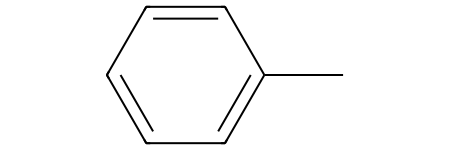

In [34]:
# 8.1.2.3 从smiles码画分子
dataML.drawMolecule('Cc1ccccc1') #括号里（SMILES码两边）请加引号

## 8.2 无机材料描述符 (NJmatML参考Matminer使用类独热编码方式特征化无机化学式)

In [35]:
# 8.2.1 导入含有无机材料化学式的csv
dataML.inorganic_csv("Inorganic_formula.csv")

        formula
0  (Fe2AgCu2)O3
1         Fe2O3
2        CsPbI3
3          MoS2
4      CuInGaSe
5            Si
6          TiO2


In [36]:
# 8.2.2 matminer无机材料（类独热编码）描述符生成，102维
# 例如(Fe2AgCu2)O3, Fe2O3, Cs3PbI3, MoS2, CuInGaSe, Si, TiO2等
dataML.inorganic_featurizer()

   index    0    1    2    3    4    5    6         7    8  ...   93   94  \
0      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.375000  0.0  ...  0.0  0.0   
1      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.600000  0.0  ...  0.0  0.0   
2      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0  0.0   
3      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0  0.0   
4      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0  0.0   
5      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0  0.0   
6      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.666667  0.0  ...  0.0  0.0   

    95   96   97   98   99  100  101  102  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[7 rows x 104 columns]
['H', '

# 9 遗传算法设计新特征

## 9.1 遗传算法默认普通运算符

In [37]:
dataML.gp_default(0.55)
# 输入参数为皮尔森阈值 ：例如输入0.6后，皮尔森系数大于0.6的新描述符才显示

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    25.23         0.194992        3         0.624881          0.46604      1.20m
0.6079379957225536 0 sub(X46, X28)
0.5983377003257466 2 sub(X22, X17)
0.5983377003257466 5 sub(X22, X17)
0.6041783556146898 7 sub(mul(X59, X23), sub(X28, X45))
0.5504098163476527 14 sub(X22, X52)


## 9.2 遗传算法更多运算符

In [38]:
dataML.gp_tan(0.55)
# 输入参数为皮尔森阈值 ：例如输入0.6后，皮尔森系数大于0.6的新描述符才显示
# function_set = ['add', 'sub', 'mul', 'div', 'log', 'sqrt', 'abs', 'neg','inv','sin','cos','tan', 'max', 'min']

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     7.91         0.229912        3         0.660018         0.585055     54.41s
0.6469270178945903 0 add(X57, X46)
0.6119544219243395 1 sub(X45, X29)
0.5946531202609672 2 min(X25, X22)
0.5792112268498514 3 cos(sqrt(sub(sub(X27, 0.854), sqrt(X29))))
0.5793672331069525 7 add(sub(X56, X7), X45)


## 9.3 tSR 默认方法 

In [ ]:
dataML.tSR_default(0.7)  #目前只是遍历，无遗传算法，有待完善，可能无法完成
# 输入参数为皮尔森阈值 ：例如输入0.6后，皮尔森系数大于0.6的新描述符才显示
# 默认形式为(X[:,i]-X[:,j])*(X[:,k]-X[:,n])